In [1]:
import pickle
import os
import numpy as np
import torch
import pandas as pd

# Load data

In [2]:
from plot_utils import *

In [13]:
from importlib import reload

import plot_utils
reload(plot_utils)
from plot_utils import *

In [4]:
%load_ext line_profiler

In [14]:
%lprun -f add_attach_dict generate_params(fixed_params=fixed_params,vary_params=vary_params,fn_template='CT_En{en}_pctrl({p_ctrl:.2f},{p_ctrl:.2f},1)_pproj({p_proj:.2f},{p_proj:.2f},1)_pglobal({p_global:.2f},{p_global:.2f},1)_L({L},{L+2},2)_xj({xj})_seed{s}_64{"_anc"*anc}.pickle',fn_dir_template='Data/Metrics/{xj}/',input_params_template='{p:.3f} {L} {seed} {ancilla}',load_data=load_pickle,filename=None,filelist=None,load=True,data_dict=None,data_dict_file='xj({xj}){"_anc"*anc}.pickle',)

Creating new data_dict Data/Metrics/1-3,2-3,-1-3/xj(1-3,2-3,-1-3).pickle


generate_params: 100%|██████████| 882/882 [00:02<00:00, 437.02it/s]


Timer unit: 1e-09 s

Total time: 0.0334349 s
File: /mnt/d/Rutgers/control_transition/plot_utils.py
Function: add_attach_dict at line 167

Line #      Hits         Time  Per Hit   % Time  Line Contents
   167                                           def add_attach_dict(data_dict,params,observations):
   168                                               """if not in dict, add it
   169                                               if already in dict, atttach it
   170                                               """
   171      2646    2217088.0    837.9      6.6      if torch.is_tensor(observations):
   172      2646    9831613.0   3715.7     29.4          observations=observations.cpu().numpy()
   173      2646   13295873.0   5024.9     39.8          observations=observations[~np.isnan(observations)]
   174      2646    1830832.0    691.9      5.5      if params in data_dict:
   175      1323    5759487.0   4353.4     17.2          data_dict[params]=np.concatenate((data_dict[params],

In [15]:
params_list=[
({'xj':'1-3,2-3,-1-3','en':2000,'anc':False},{'p_ctrl':np.linspace(0,0.6,21),'p_proj':np.linspace(0,0.0,1),'p_global':np.linspace(0,1,21),'s':np.arange(1),'L':np.array([8,12,16])}),
({'xj':'1-3,2-3,-1-3','en':1000,'anc':False},{'p_ctrl':np.linspace(0,0.6,21),'p_proj':np.linspace(0,0.0,1),'p_global':np.linspace(0,1,21),'s':np.arange(2),'L':np.array([20])}),
({'xj':'1-3,2-3,-1-3','en':60,'anc':False},{'p_ctrl':np.linspace(0,0.6,21),'p_proj':np.linspace(0,0.0,1),'p_global':np.linspace(0,1,21),'s':np.arange(32),'L':np.array([24])}),
]
for fixed_params,vary_params in params_list:
    data_int_dict=generate_params(
        fixed_params=fixed_params,
        vary_params=vary_params,
        fn_template='CT_En{en}_pctrl({p_ctrl:.2f},{p_ctrl:.2f},1)_pproj({p_proj:.2f},{p_proj:.2f},1)_pglobal({p_global:.2f},{p_global:.2f},1)_L({L},{L+2},2)_xj({xj})_seed{s}_64{"_anc"*anc}.pickle',
        fn_dir_template='Data/Metrics/{xj}/',
        input_params_template='{p:.3f} {L} {seed} {ancilla}',
        load_data=load_pickle,
        filename=None,
        filelist=None,
        load=True,
        data_dict=None,
        data_dict_file='xj({xj}){"_anc"*anc}.pickle', 
    )


df_int=convert_pd(data_int_dict,names=['Metrics','L','p_ctrl','p_proj','p_global'])

Creating new data_dict Data/Metrics/1-3,2-3,-1-3/xj(1-3,2-3,-1-3).pickle


generate_params: 100%|██████████| 1323/1323 [00:02<00:00, 443.08it/s]


Loading data_dict Data/Metrics/1-3,2-3,-1-3/xj(1-3,2-3,-1-3).pickle


generate_params: 100%|██████████| 882/882 [00:01<00:00, 466.38it/s]


Loading data_dict Data/Metrics/1-3,2-3,-1-3/xj(1-3,2-3,-1-3).pickle


generate_params: 100%|██████████| 14112/14112 [00:28<00:00, 490.91it/s]


In [16]:
fns=set(os.listdir('Data/Metrics/1-3,2-3,-1-3'))

In [17]:
len(data_int_dict['fn'])

16316

In [18]:
[fn for fn in fns-data_int_dict['fn'] ]

['xj(1-3,2-3,-1-3).pickle.bak', 'xj(1-3,2-3,-1-3).pickle']

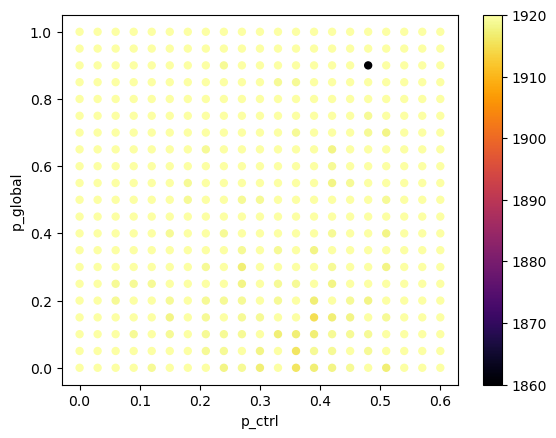

In [19]:
visualize_dataset(df_int,params={'Metrics':'O','L':24,'p_proj':0},xlabel='p_ctrl',ylabel='p_global')

# Plot

## O

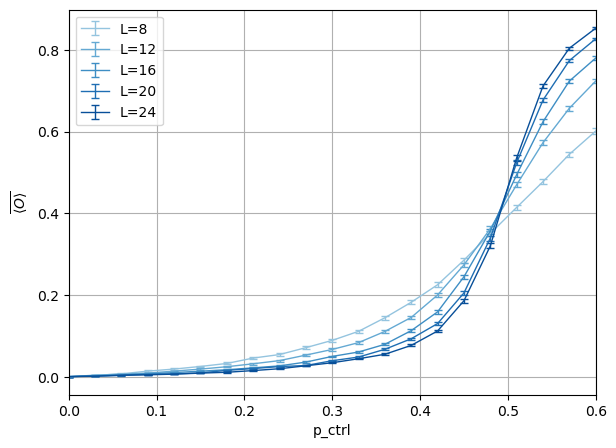

In [20]:
plot_line_inset(df=df_int,
L_list=np.arange(8,26,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='O',
x_name='p_ctrl',
fixed_params={'p_proj':0,'p_global':0.0},
yscale=None,
errorbar=True,
filename=None,
)

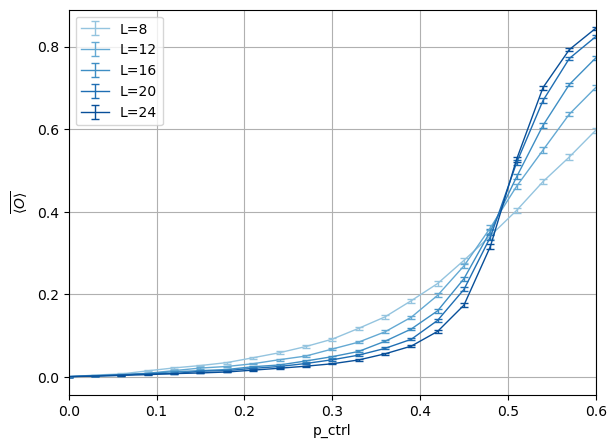

In [21]:
plot_line_inset(df=df_int,
L_list=np.arange(8,26,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='O',
x_name='p_ctrl',
fixed_params={'p_proj':0,'p_global':0.05},
yscale=None,
errorbar=True,
filename=None,
)

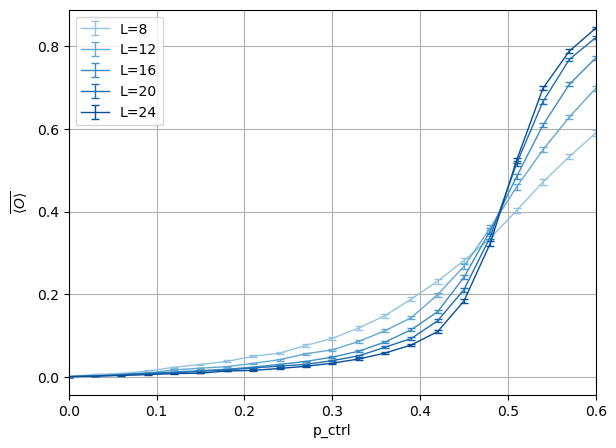

In [22]:
plot_line_inset(df=df_int,
L_list=np.arange(8,26,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='O',
x_name='p_ctrl',
fixed_params={'p_proj':0,'p_global':0.1},
yscale=None,
errorbar=True,
filename=None,
)

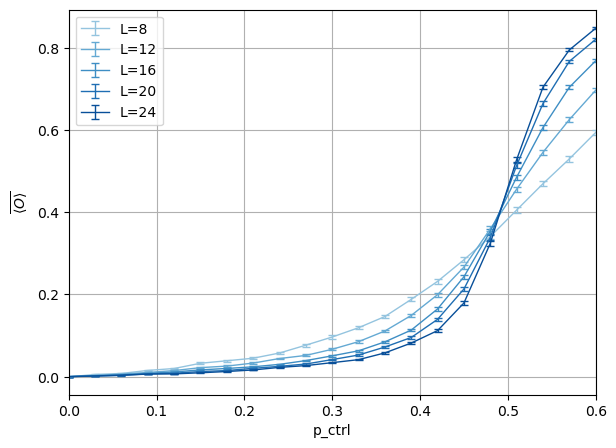

In [23]:
plot_line_inset(df=df_int,
L_list=np.arange(8,26,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='O',
x_name='p_ctrl',
fixed_params={'p_proj':0,'p_global':0.15},
yscale=None,
errorbar=True,
filename=None,
)

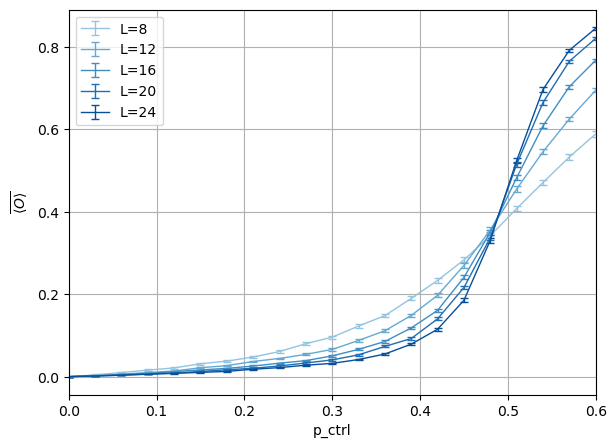

In [24]:
plot_line_inset(df=df_int,
L_list=np.arange(8,26,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='O',
x_name='p_ctrl',
fixed_params={'p_proj':0,'p_global':0.2},
yscale=None,
errorbar=True,
filename=None,
)

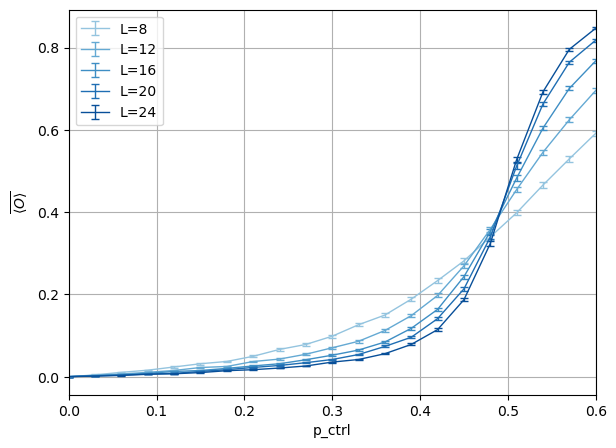

In [25]:
plot_line_inset(df=df_int,
L_list=np.arange(8,26,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='O',
x_name='p_ctrl',
fixed_params={'p_proj':0,'p_global':0.25},
yscale=None,
errorbar=True,
filename=None,
)

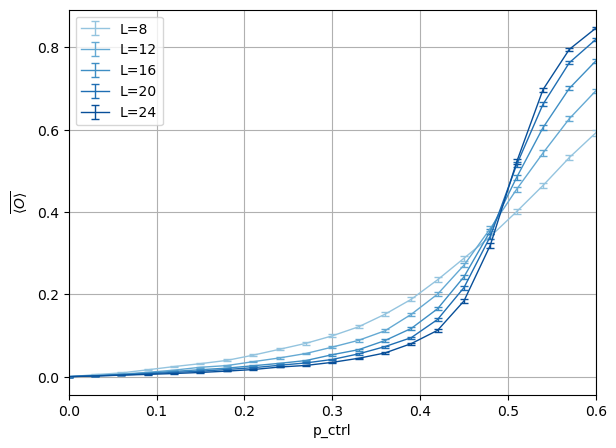

In [24]:
plot_line_inset(df=df_int,
L_list=np.arange(8,26,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='O',
x_name='p_ctrl',
fixed_params={'p_proj':0,'p_global':0.3},
yscale=None,
errorbar=True,
filename=None,
)

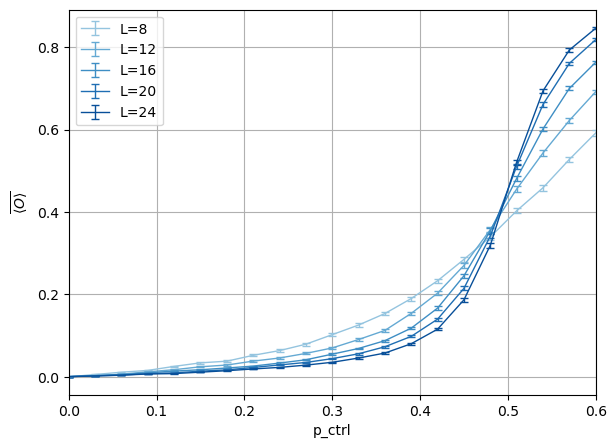

In [25]:
plot_line_inset(df=df_int,
L_list=np.arange(8,26,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='O',
x_name='p_ctrl',
fixed_params={'p_proj':0,'p_global':0.35},
yscale=None,
errorbar=True,
filename=None,
)

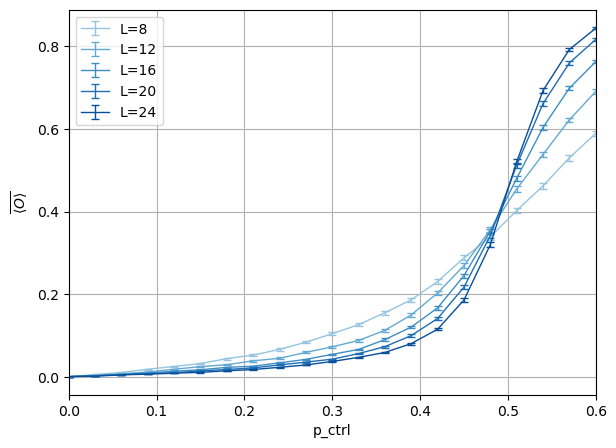

In [26]:
plot_line_inset(df=df_int,
L_list=np.arange(8,26,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='O',
x_name='p_ctrl',
fixed_params={'p_proj':0,'p_global':0.4},
yscale=None,
errorbar=True,
filename=None,
)

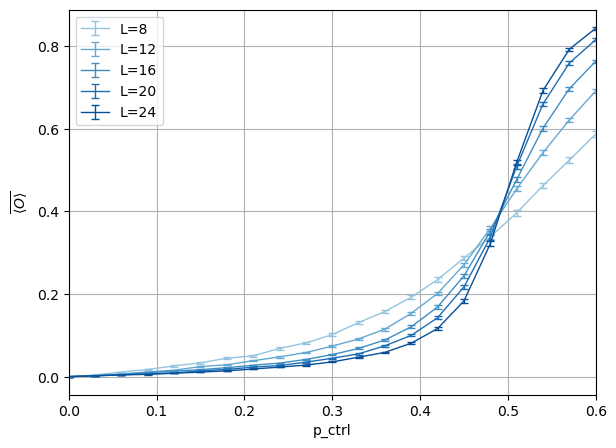

In [27]:
plot_line_inset(df=df_int,
L_list=np.arange(8,26,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='O',
x_name='p_ctrl',
fixed_params={'p_proj':0,'p_global':0.45},
yscale=None,
errorbar=True,
filename=None,
)

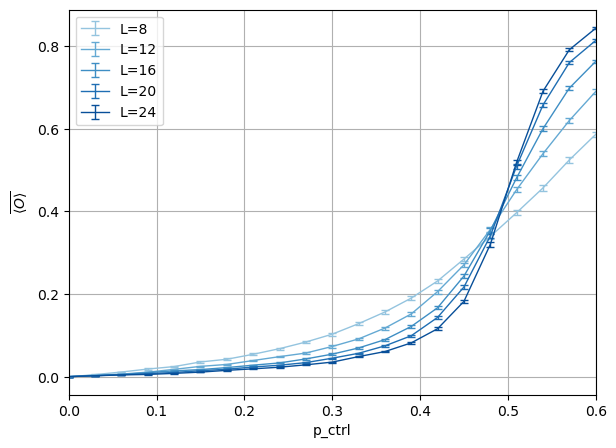

In [28]:
plot_line_inset(df=df_int,
L_list=np.arange(8,26,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='O',
x_name='p_ctrl',
fixed_params={'p_proj':0,'p_global':0.5},
yscale=None,
errorbar=True,
filename=None,
)

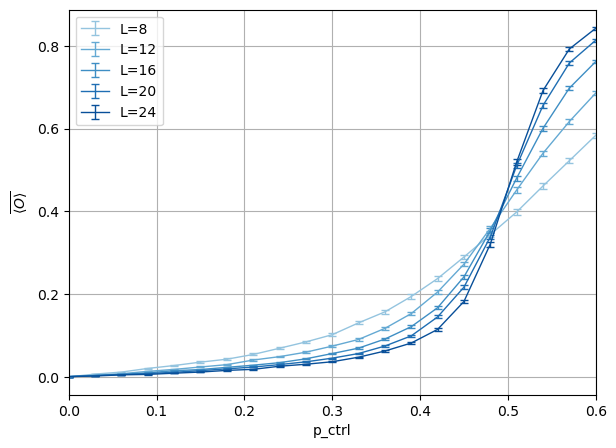

In [205]:
plot_line_inset(df=df_int,
L_list=np.arange(8,26,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='O',
x_name='p_ctrl',
fixed_params={'p_proj':0,'p_global':0.55},
yscale=None,
errorbar=True,
filename=None,
)

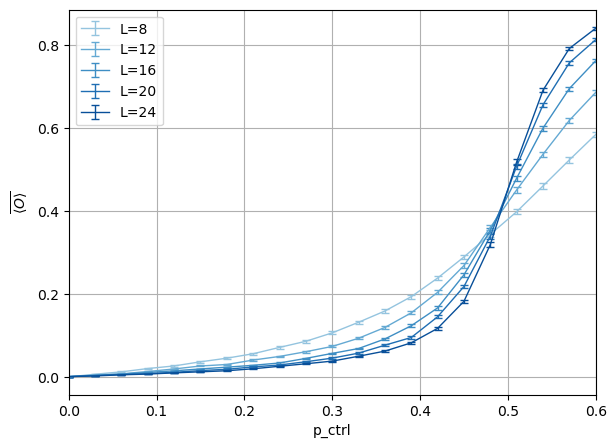

In [23]:
plot_line_inset(df=df_int,
L_list=np.arange(8,26,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='O',
x_name='p_ctrl',
fixed_params={'p_proj':0,'p_global':0.6},
yscale=None,
errorbar=True,
filename=None,
)

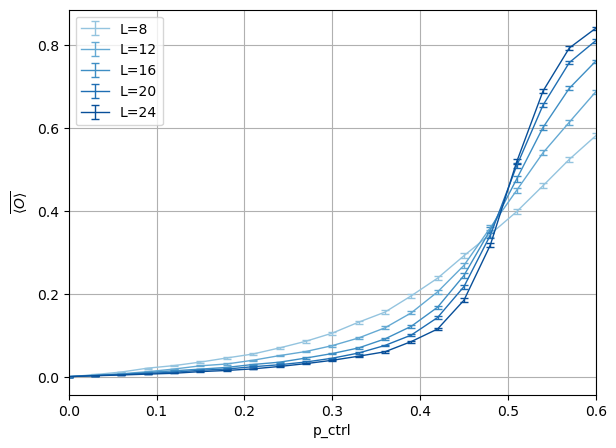

In [24]:
plot_line_inset(df=df_int,
L_list=np.arange(8,26,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='O',
x_name='p_ctrl',
fixed_params={'p_proj':0,'p_global':0.65},
yscale=None,
errorbar=True,
filename=None,
)

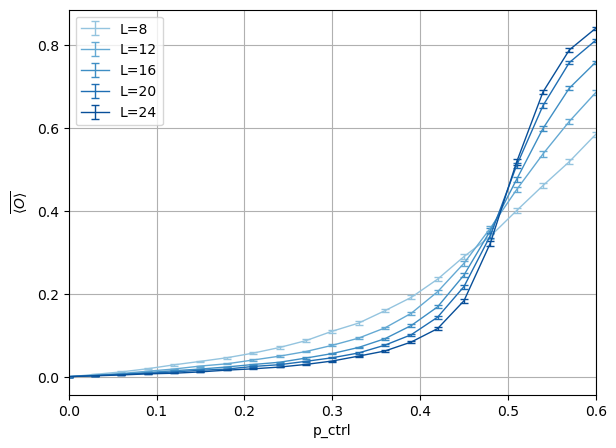

In [25]:
plot_line_inset(df=df_int,
L_list=np.arange(8,26,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='O',
x_name='p_ctrl',
fixed_params={'p_proj':0,'p_global':0.7},
yscale=None,
errorbar=True,
filename=None,
)

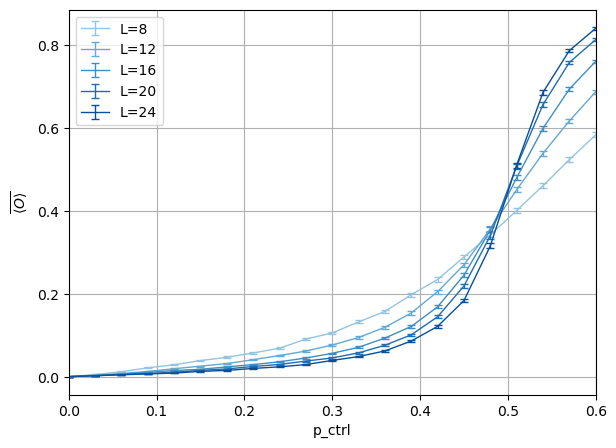

In [30]:
plot_line_inset(df=df_int,
L_list=np.arange(8,26,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='O',
x_name='p_ctrl',
fixed_params={'p_proj':0,'p_global':0.75},
yscale=None,
errorbar=True,
filename=None,
)

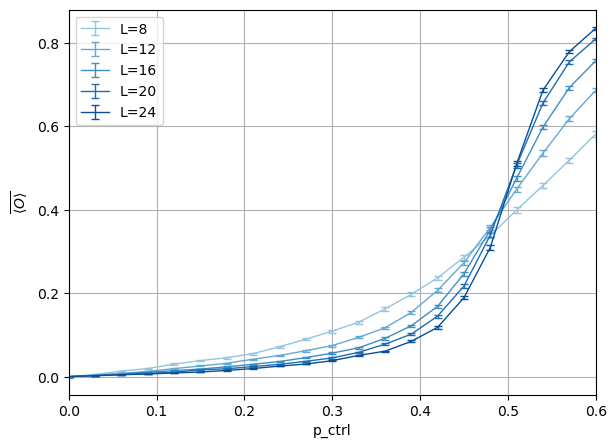

In [33]:
plot_line_inset(df=df_int,
L_list=np.arange(8,26,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='O',
x_name='p_ctrl',
fixed_params={'p_proj':0,'p_global':0.8},
yscale=None,
errorbar=True,
filename=None,
)

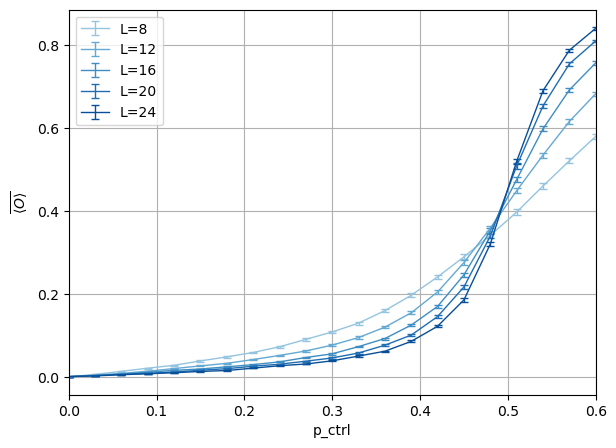

In [36]:
plot_line_inset(df=df_int,
L_list=np.arange(8,26,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='O',
x_name='p_ctrl',
fixed_params={'p_proj':0,'p_global':0.85},
yscale=None,
errorbar=True,
filename=None,
)

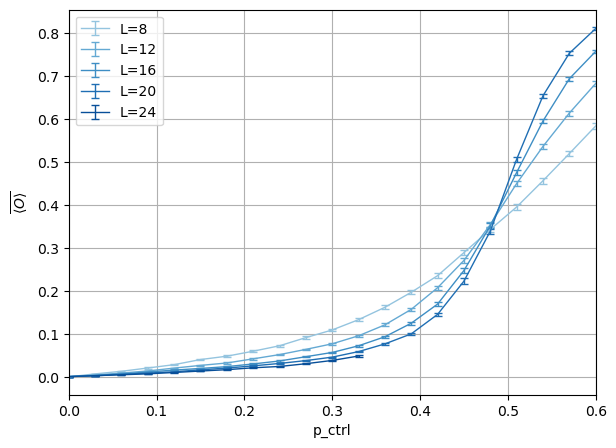

In [39]:
plot_line_inset(df=df_int,
L_list=np.arange(8,26,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='O',
x_name='p_ctrl',
fixed_params={'p_proj':0,'p_global':0.9},
yscale=None,
errorbar=True,
filename=None,
)

## EE

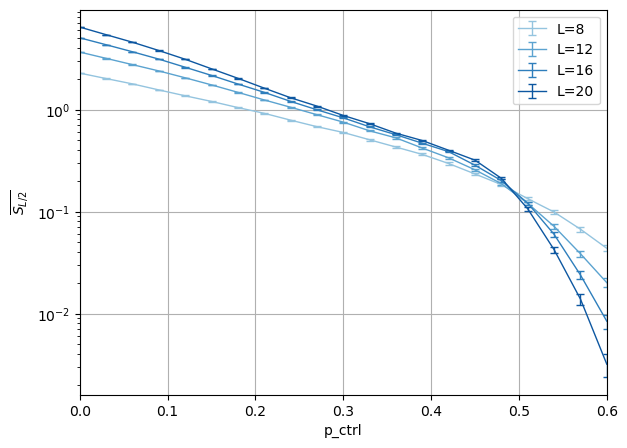

In [11]:
plot_line_inset(df=df_int,
L_list=np.arange(8,24,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='EE',
x_name='p_ctrl',
fixed_params={'p_proj':0,'p_global':0.},
yscale='log',
errorbar=True,
filename=None,
)

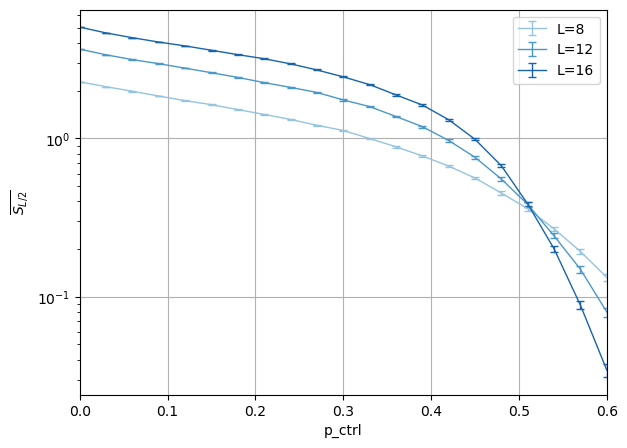

In [14]:
plot_line_inset(df=df_int,
L_list=np.arange(8,20,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='EE',
x_name='p_ctrl',
fixed_params={'p_proj':0,'p_global':0.5},
yscale='log',
errorbar=True,
filename=None,
)

## TMI

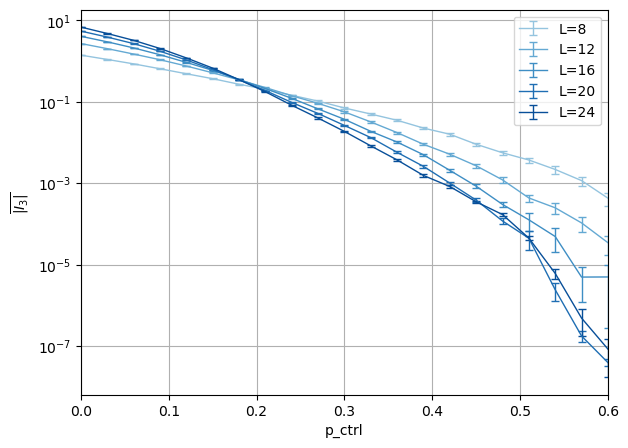

In [9]:
plot_line_inset(df=df_int,
L_list=np.arange(8,26,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='TMI',
x_name='p_ctrl',
fixed_params={'p_proj':0,'p_global':0.},
yscale='log',
errorbar=True,
filename=None,
)

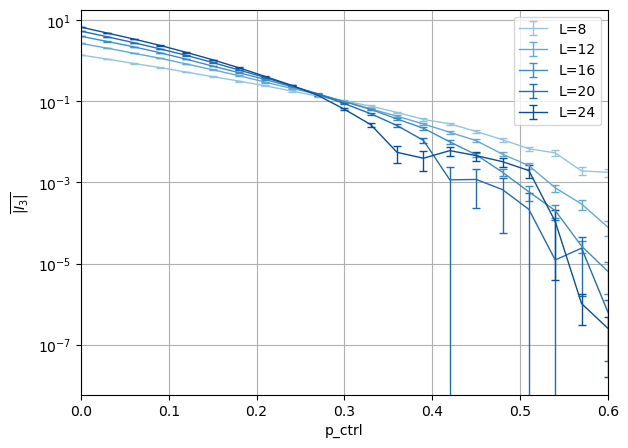

In [10]:
plot_line_inset(df=df_int,
L_list=np.arange(8,26,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='TMI',
x_name='p_ctrl',
fixed_params={'p_proj':0,'p_global':0.05},
yscale='log',
errorbar=True,
filename=None,
)

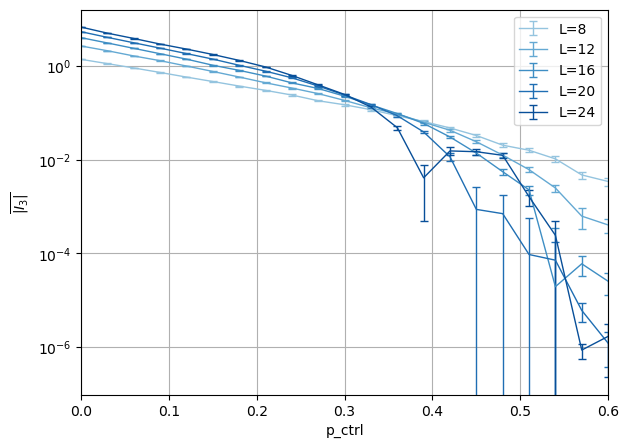

In [11]:
plot_line_inset(df=df_int,
L_list=np.arange(8,26,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='TMI',
x_name='p_ctrl',
fixed_params={'p_proj':0,'p_global':0.15},
yscale='log',
errorbar=True,
filename=None,
)

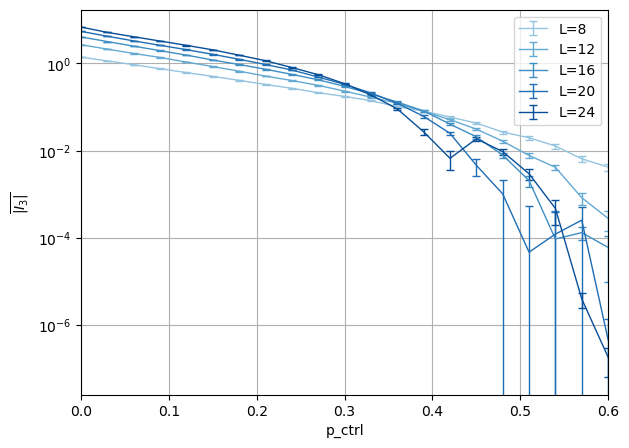

In [32]:
plot_line_inset(df=df_int,
L_list=np.arange(8,26,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='TMI',
x_name='p_ctrl',
fixed_params={'p_proj':0,'p_global':0.2},
yscale='log',
errorbar=True,
filename=None,
)

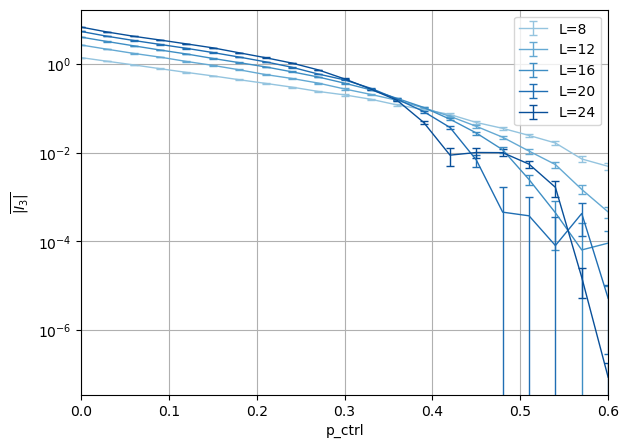

In [13]:
plot_line_inset(df=df_int,
L_list=np.arange(8,26,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='TMI',
x_name='p_ctrl',
fixed_params={'p_proj':0,'p_global':0.25},
yscale='log',
errorbar=True,
filename=None,
)

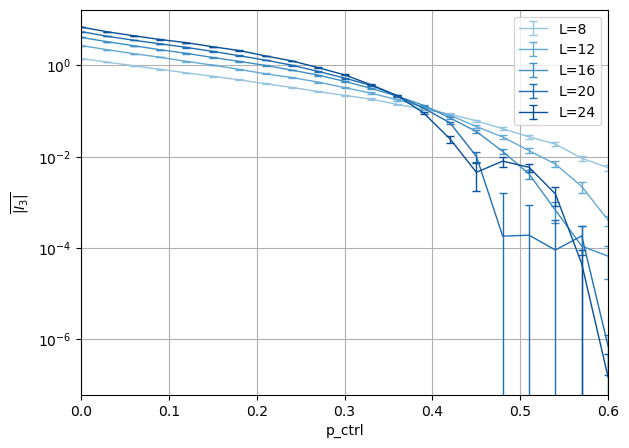

In [44]:
plot_line_inset(df=df_int,
L_list=np.arange(8,26,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='TMI',
x_name='p_ctrl',
fixed_params={'p_proj':0,'p_global':0.3},
yscale='log',
errorbar=True,
filename=None,
)

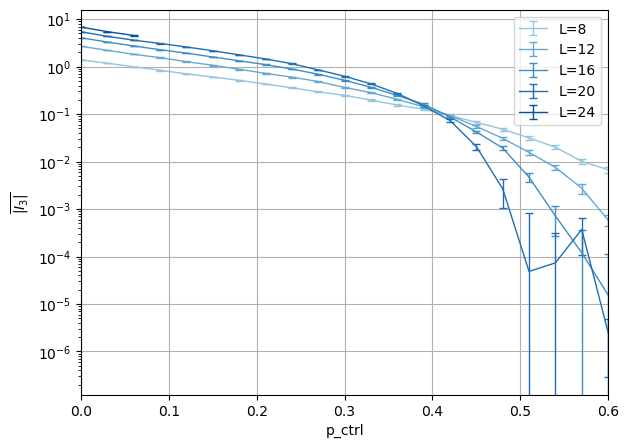

In [15]:
plot_line_inset(df=df_int,
L_list=np.arange(8,26,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='TMI',
x_name='p_ctrl',
fixed_params={'p_proj':0,'p_global':0.35},
yscale='log',
errorbar=True,
filename=None,
)

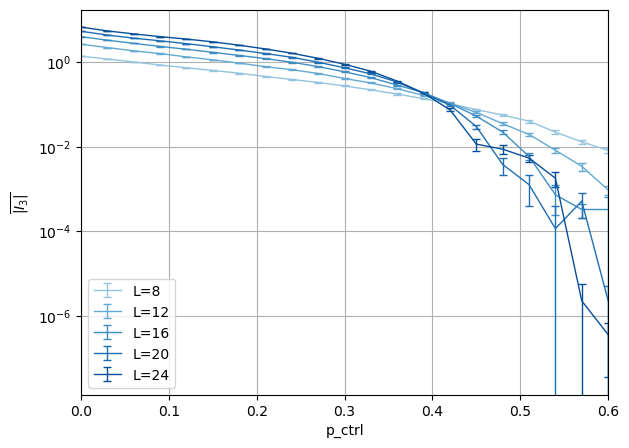

In [43]:
plot_line_inset(df=df_int,
L_list=np.arange(8,26,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='TMI',
x_name='p_ctrl',
fixed_params={'p_proj':0,'p_global':0.4},
yscale='log',
errorbar=True,
filename=None,
)

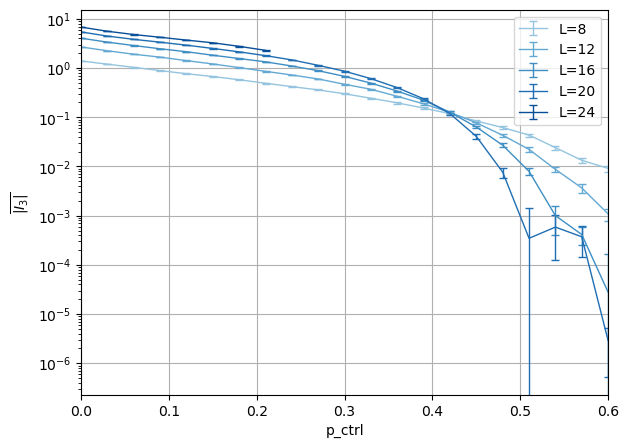

In [47]:
plot_line_inset(df=df_int,
L_list=np.arange(8,26,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='TMI',
x_name='p_ctrl',
fixed_params={'p_proj':0,'p_global':0.45},
yscale='log',
errorbar=True,
filename=None,
)

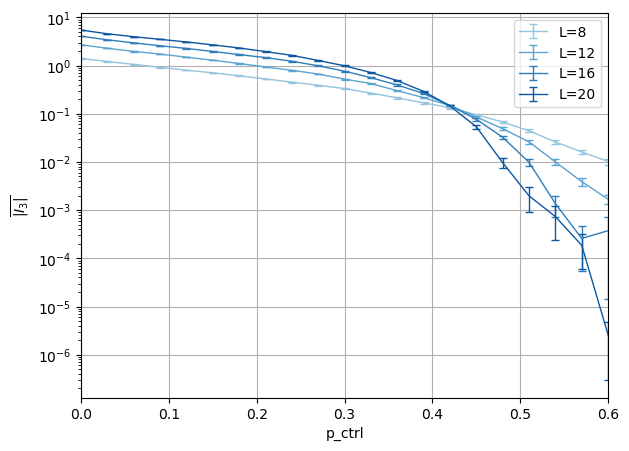

In [19]:
plot_line_inset(df=df_int,
L_list=np.arange(8,24,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='TMI',
x_name='p_ctrl',
fixed_params={'p_proj':0,'p_global':0.5},
yscale='log',
errorbar=True,
filename=None,
)

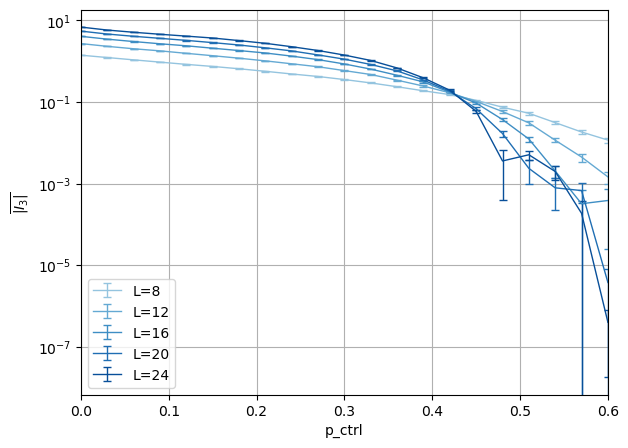

In [71]:
plot_line_inset(df=df_int,
L_list=np.arange(8,26,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='TMI',
x_name='p_ctrl',
fixed_params={'p_proj':0,'p_global':0.55},
yscale='log',
errorbar=True,
filename=None,
)

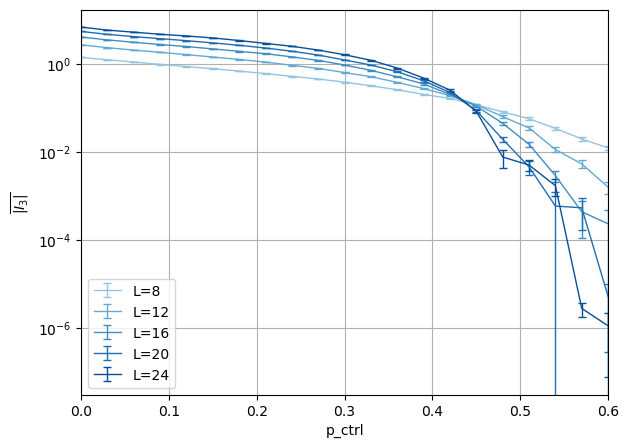

In [80]:
plot_line_inset(df=df_int,
L_list=np.arange(8,26,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='TMI',
x_name='p_ctrl',
fixed_params={'p_proj':0,'p_global':0.6},
yscale='log',
errorbar=True,
filename=None,
)

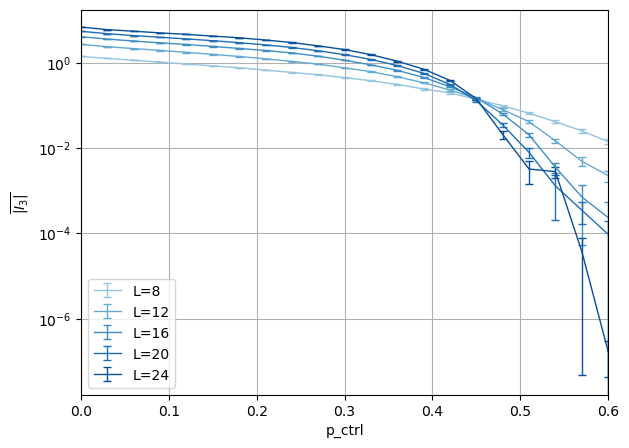

In [87]:
plot_line_inset(df=df_int,
L_list=np.arange(8,26,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='TMI',
x_name='p_ctrl',
fixed_params={'p_proj':0,'p_global':0.7},
yscale='log',
errorbar=True,
filename=None,
)

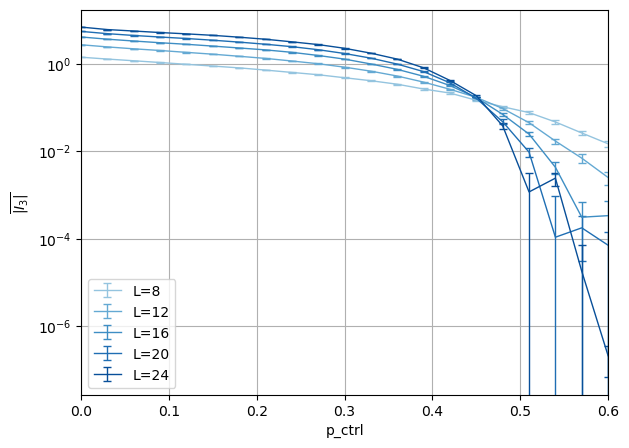

In [343]:
plot_line_inset(df=df_int,
L_list=np.arange(8,26,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='TMI',
x_name='p_ctrl',
fixed_params={'p_proj':0,'p_global':0.75},
yscale='log',
errorbar=True,
filename=None,
)

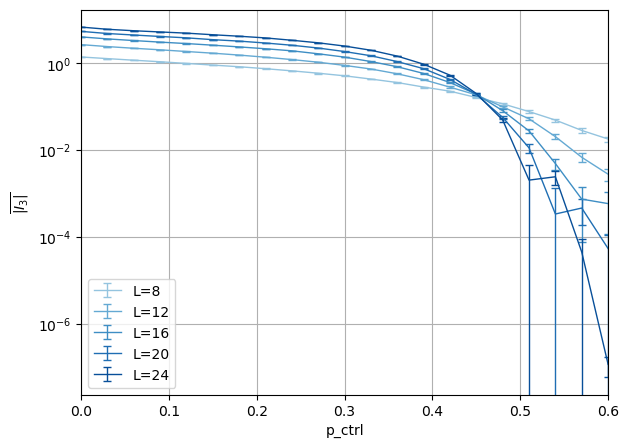

In [349]:
plot_line_inset(df=df_int,
L_list=np.arange(8,26,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='TMI',
x_name='p_ctrl',
fixed_params={'p_proj':0,'p_global':0.8},
yscale='log',
errorbar=True,
filename=None,
)

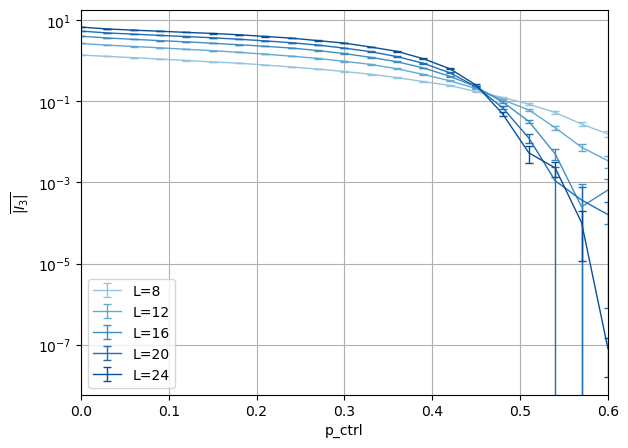

In [58]:
plot_line_inset(df=df_int,
L_list=np.arange(8,26,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='TMI',
x_name='p_ctrl',
fixed_params={'p_proj':0,'p_global':0.85},
yscale='log',
errorbar=True,
filename=None,
)

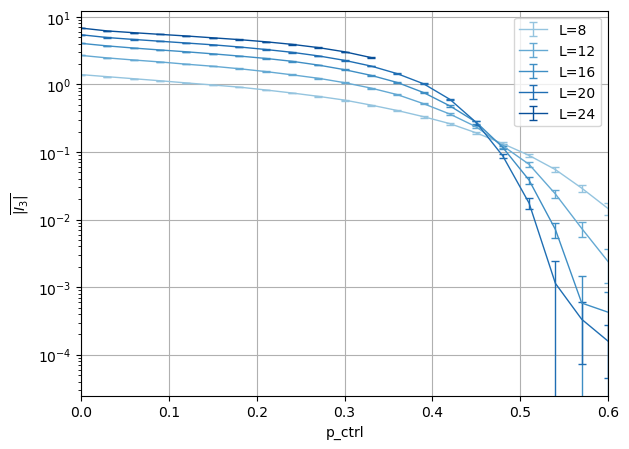

In [71]:
plot_line_inset(df=df_int,
L_list=np.arange(8,26,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='TMI',
x_name='p_ctrl',
fixed_params={'p_proj':0,'p_global':0.9},
yscale='log',
errorbar=True,
filename=None,
)

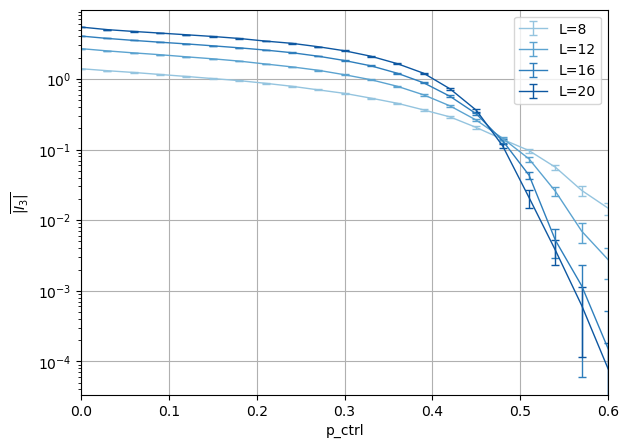

In [173]:
plot_line_inset(df=df_int,
L_list=np.arange(8,24,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='TMI',
x_name='p_ctrl',
fixed_params={'p_proj':0,'p_global':0.95},
yscale='log',
errorbar=True,
filename=None,
)

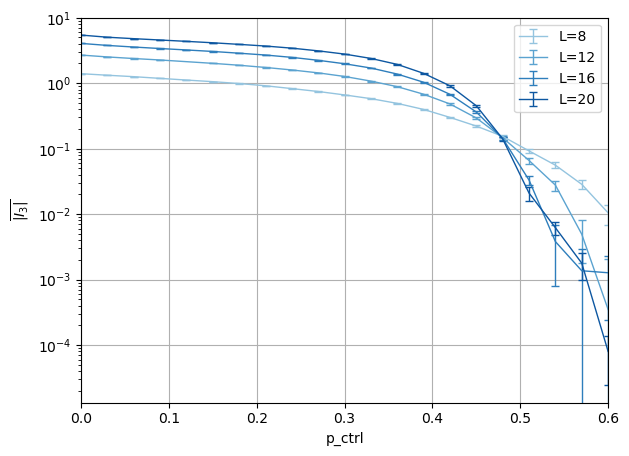

In [120]:
plot_line_inset(df=df_int,
L_list=np.arange(8,24,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='TMI',
x_name='p_ctrl',
fixed_params={'p_proj':0,'p_global':1},
yscale='log',
errorbar=True,
filename=None,
)

# Data Collapse

## O

In [29]:
dc_O_opt=optimal_df(names=['Metrics', 'p_proj', 'p_ctrl','p_global'])

In [30]:
dc=DataCollapse(df=df_int,params={'Metrics':'O','p_proj':0,'p_global':0.},Lmin=12,Lmax=24,p_range=[0.4,.58],p_dim=3)
dc.datacollapse(nu=1.,p_c=0.485,)

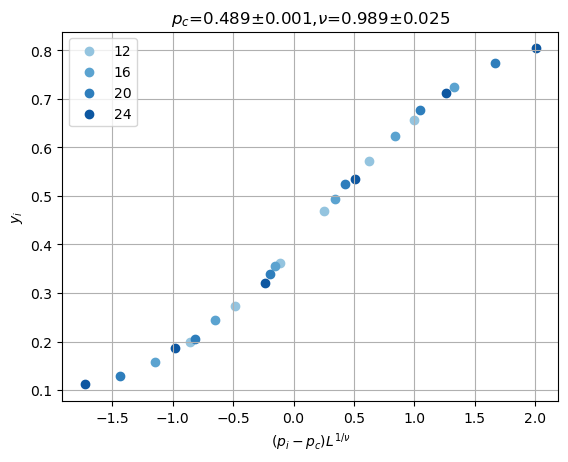

In [31]:
dc.plot_data_collapse()

In [32]:
dc_O_opt.add_optimal(dc)

In [33]:
dc=DataCollapse(df=df_int,params={'Metrics':'O','p_proj':0,'p_global':0.05},Lmin=12,Lmax=24,p_range=[0.4,.58],p_dim=3)
dc.datacollapse(nu=1.,p_c=0.485,)

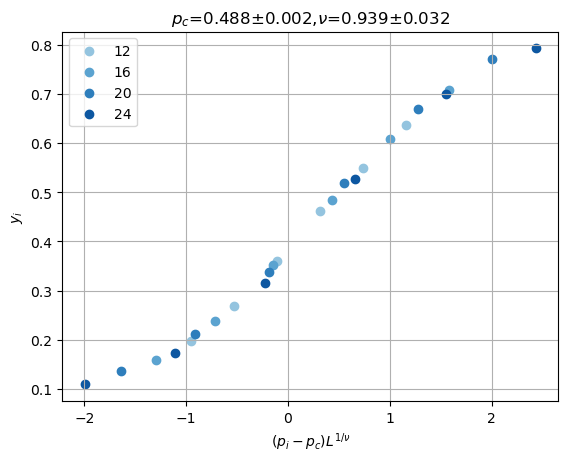

In [34]:
dc.plot_data_collapse()

In [35]:
dc_O_opt.add_optimal(dc)

In [36]:
dc=DataCollapse(df=df_int,params={'Metrics':'O','p_proj':0,'p_global':0.1},Lmin=12,Lmax=24,p_range=[0.4,.58],p_dim=3)
dc.datacollapse(nu=1.,p_c=0.485,)

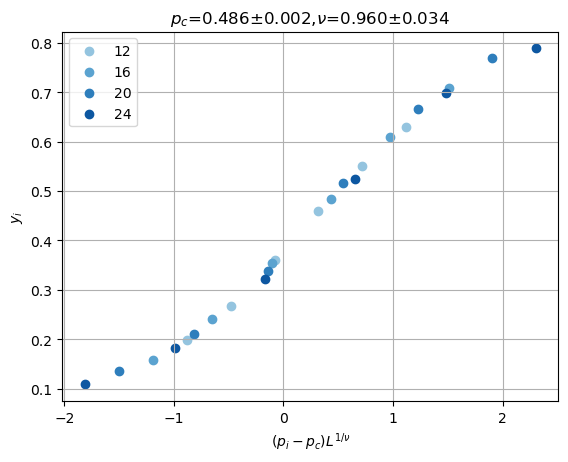

In [37]:
dc.plot_data_collapse()

In [38]:
dc_O_opt.add_optimal(dc)

In [39]:
dc=DataCollapse(df=df_int,params={'Metrics':'O','p_proj':0,'p_global':0.15},Lmin=12,Lmax=24,p_range=[0.4,.58],p_dim=3)
dc.datacollapse(nu=1.,p_c=0.485,)

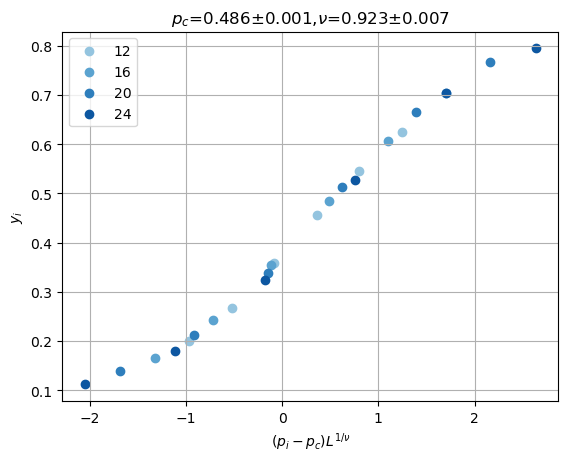

In [40]:
dc.plot_data_collapse()

In [41]:
dc_O_opt.add_optimal(dc)

In [42]:
dc=DataCollapse(df=df_int,params={'Metrics':'O','p_proj':0,'p_global':0.2},Lmin=12,Lmax=24,p_range=[0.4,.58],p_dim=3)
dc.datacollapse(nu=1.,p_c=0.485,)

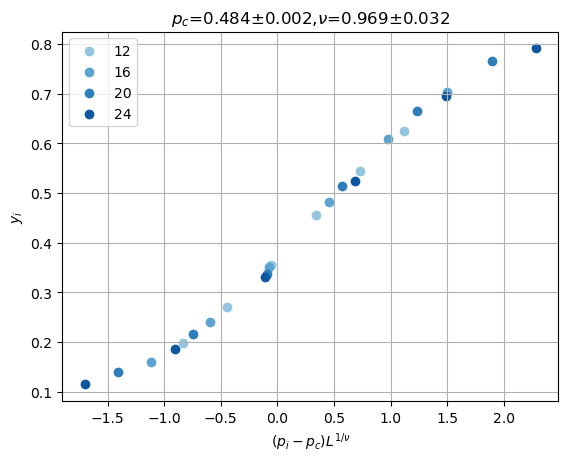

In [43]:
dc.plot_data_collapse()

In [44]:
dc_O_opt.add_optimal(dc)

In [45]:
dc=DataCollapse(df=df_int,params={'Metrics':'O','p_proj':0,'p_global':0.25},Lmin=12,Lmax=24,p_range=[0.4,.58],p_dim=3)
dc.datacollapse(nu=1.,p_c=0.485,)

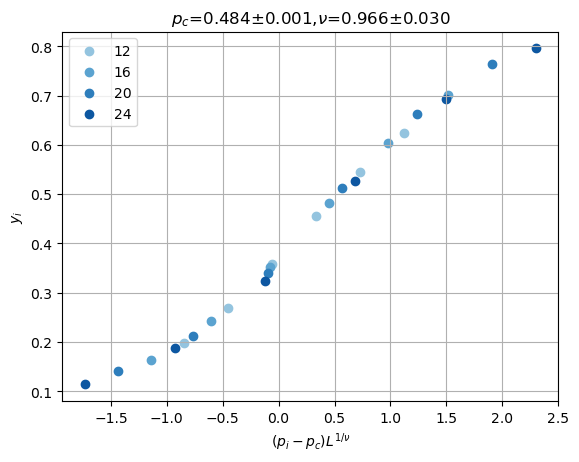

In [46]:
dc.plot_data_collapse()

In [47]:
dc_O_opt.add_optimal(dc)

In [48]:
dc=DataCollapse(df=df_int,params={'Metrics':'O','p_proj':0,'p_global':0.3},Lmin=12,Lmax=24,p_range=[0.4,.58],p_dim=3)
dc.datacollapse(nu=1.,p_c=0.485,)

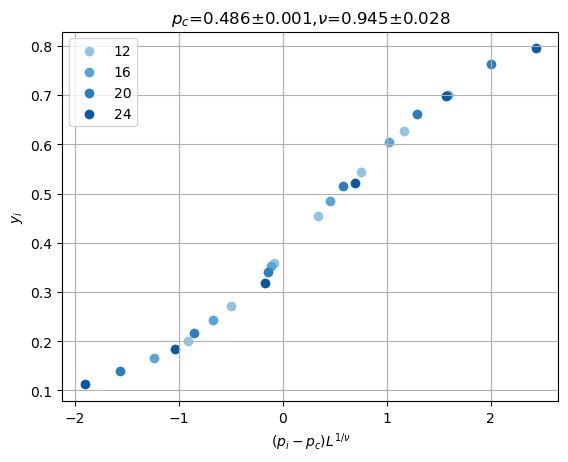

In [49]:
dc.plot_data_collapse()

In [50]:
dc_O_opt.add_optimal(dc)

In [51]:
dc=DataCollapse(df=df_int,params={'Metrics':'O','p_proj':0,'p_global':0.35},Lmin=12,Lmax=24,p_range=[0.4,.58],p_dim=3)
dc.datacollapse(nu=1.,p_c=0.485,)

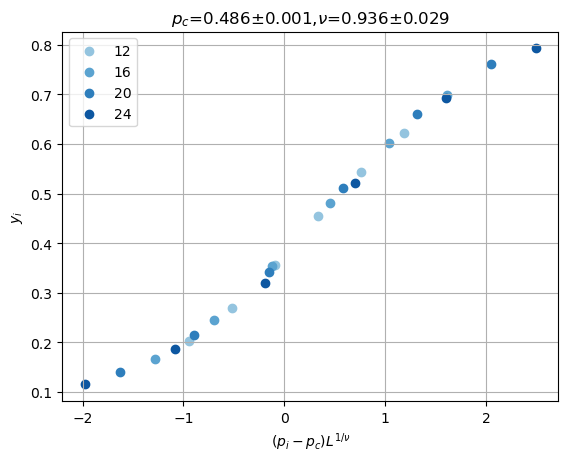

In [52]:
dc.plot_data_collapse()

In [53]:
dc_O_opt.add_optimal(dc)

In [54]:
dc=DataCollapse(df=df_int,params={'Metrics':'O','p_proj':0,'p_global':0.4},Lmin=12,Lmax=24,p_range=[0.4,.58],p_dim=3)
dc.datacollapse(nu=1.,p_c=0.485,)

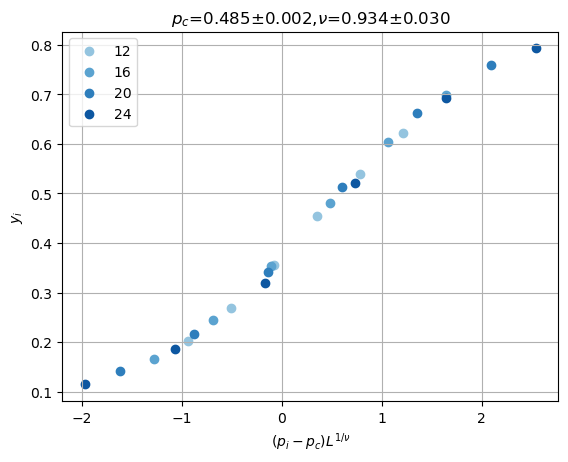

In [55]:
dc.plot_data_collapse()

In [56]:
dc_O_opt.add_optimal(dc)

In [57]:
dc=DataCollapse(df=df_int,params={'Metrics':'O','p_proj':0,'p_global':0.45},Lmin=12,Lmax=24,p_range=[0.4,.58],p_dim=3)
dc.datacollapse(nu=1.,p_c=0.485,)

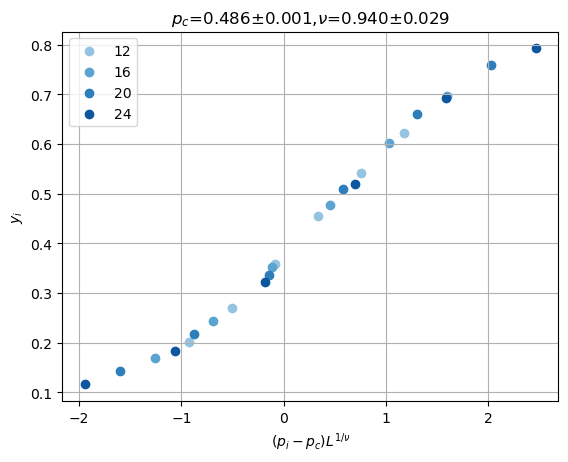

In [58]:
dc.plot_data_collapse()

In [59]:
dc_O_opt.add_optimal(dc)

In [60]:
dc=DataCollapse(df=df_int,params={'Metrics':'O','p_proj':0,'p_global':0.5},Lmin=12,Lmax=24,p_range=[0.4,.58],p_dim=3)
dc.datacollapse(nu=1.,p_c=0.485,)

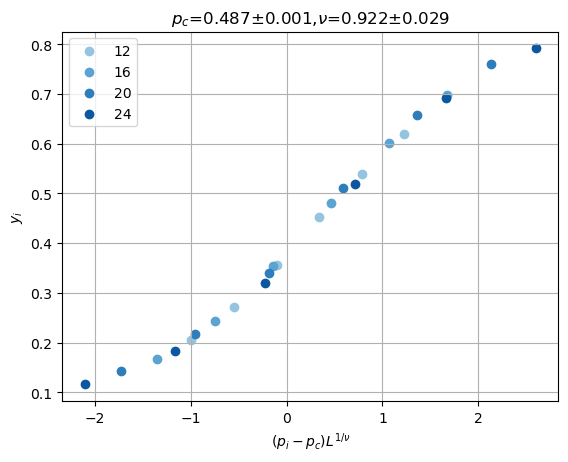

In [61]:
dc.plot_data_collapse()

In [62]:
dc_O_opt.add_optimal(dc)

In [63]:
dc=DataCollapse(df=df_int,params={'Metrics':'O','p_proj':0,'p_global':0.55},Lmin=12,Lmax=24,p_range=[0.4,.58],p_dim=3)
dc.datacollapse(nu=1.,p_c=0.485,)

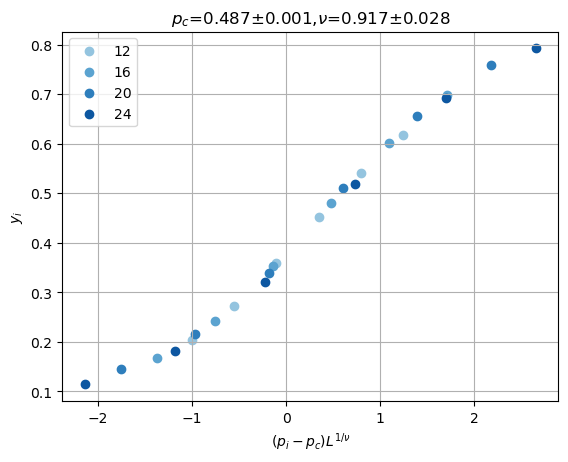

In [64]:
dc.plot_data_collapse()

In [65]:
dc_O_opt.add_optimal(dc)

In [66]:
dc=DataCollapse(df=df_int,params={'Metrics':'O','p_proj':0,'p_global':0.6},Lmin=12,Lmax=24,p_range=[0.4,.58],p_dim=3)
dc.datacollapse(nu=1.,p_c=0.485,)

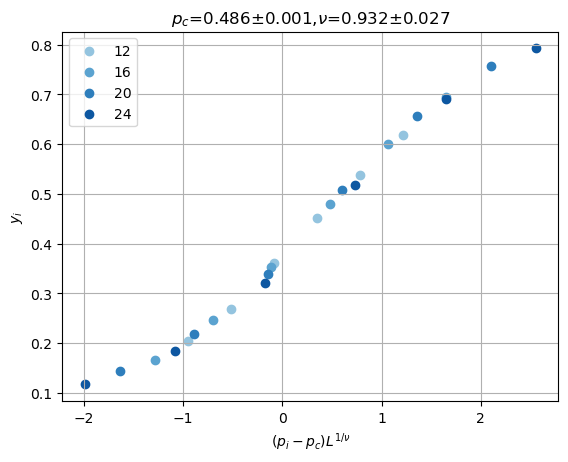

In [67]:
dc.plot_data_collapse()

In [68]:
dc_O_opt.add_optimal(dc)

In [69]:
dc=DataCollapse(df=df_int,params={'Metrics':'O','p_proj':0,'p_global':0.65},Lmin=12,Lmax=24,p_range=[0.4,.58],p_dim=3)
dc.datacollapse(nu=1.,p_c=0.485,)

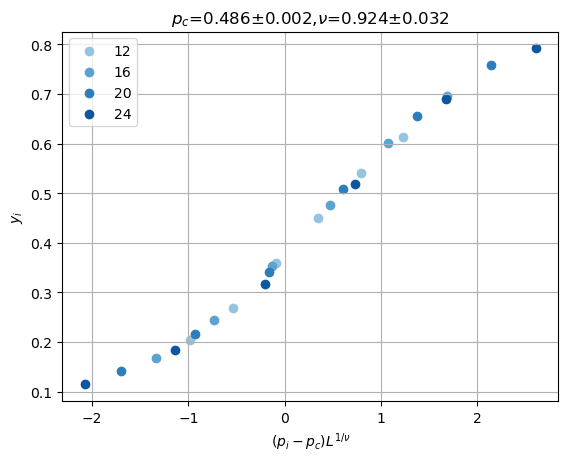

In [70]:
dc.plot_data_collapse()

In [71]:
dc_O_opt.add_optimal(dc)

In [72]:
dc=DataCollapse(df=df_int,params={'Metrics':'O','p_proj':0,'p_global':0.7},Lmin=12,Lmax=24,p_range=[0.4,.58],p_dim=3)
dc.datacollapse(nu=1.,p_c=0.485,)

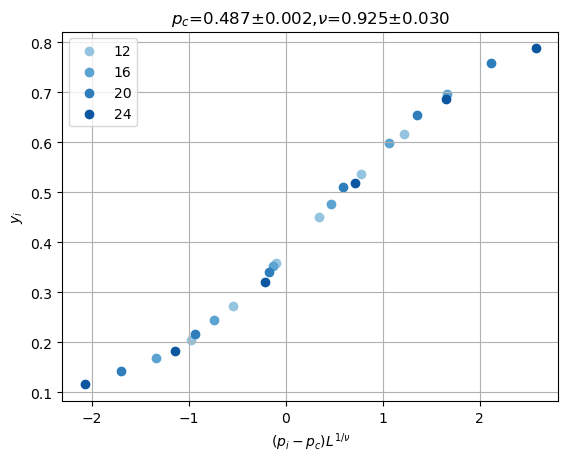

In [73]:
dc.plot_data_collapse()

In [74]:
dc_O_opt.add_optimal(dc)

In [75]:
dc=DataCollapse(df=df_int,params={'Metrics':'O','p_proj':0,'p_global':0.75},Lmin=12,Lmax=24,p_range=[0.4,.58],p_dim=3)
dc.datacollapse(nu=1.,p_c=0.485,)

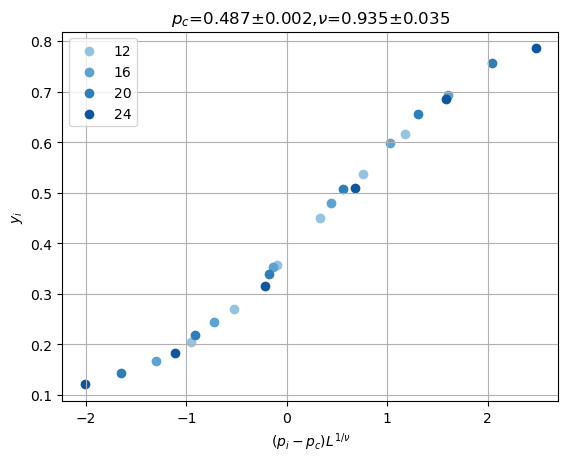

In [76]:
dc.plot_data_collapse()

In [77]:
dc_O_opt.add_optimal(dc)

In [78]:
dc=DataCollapse(df=df_int,params={'Metrics':'O','p_proj':0,'p_global':0.8},Lmin=12,Lmax=24,p_range=[0.4,.58],p_dim=3)
dc.datacollapse(nu=1.,p_c=0.485,)

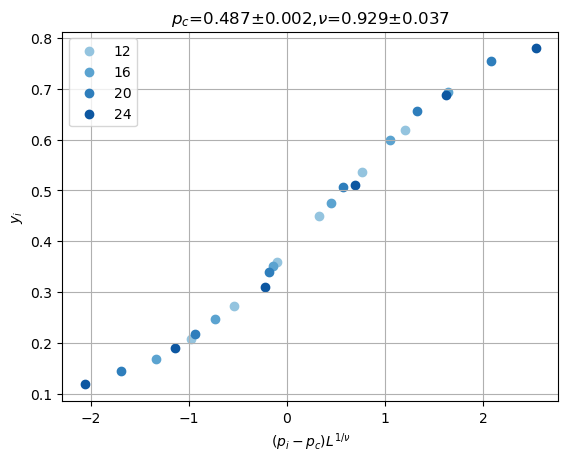

In [79]:
dc.plot_data_collapse()

In [80]:
dc_O_opt.add_optimal(dc)

In [81]:
dc=DataCollapse(df=df_int,params={'Metrics':'O','p_proj':0,'p_global':0.85},Lmin=12,Lmax=24,p_range=[0.4,.58],p_dim=3)
dc.datacollapse(nu=1.,p_c=0.485,)

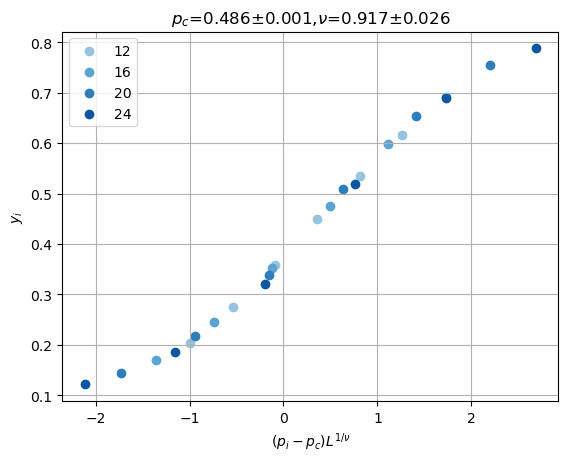

In [82]:
dc.plot_data_collapse()

In [83]:
dc_O_opt.add_optimal(dc)

In [84]:
dc=DataCollapse(df=df_int,params={'Metrics':'O','p_proj':0,'p_global':0.9},Lmin=12,Lmax=24,p_range=[0.4,.58],p_dim=3)
dc.datacollapse(nu=1.,p_c=0.485,)

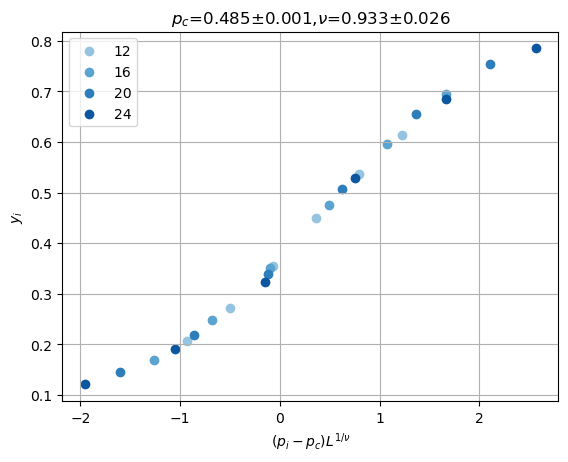

In [85]:
dc.plot_data_collapse()

In [86]:
dc_O_opt.add_optimal(dc)

In [87]:
dc=DataCollapse(df=df_int,params={'Metrics':'O','p_proj':0,'p_global':0.95},Lmin=12,Lmax=24,p_range=[0.4,.58],p_dim=3)
dc.datacollapse(nu=1.,p_c=0.485,)

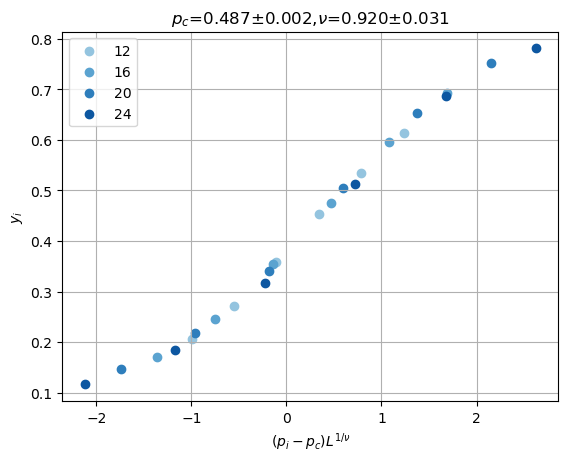

In [88]:
dc.plot_data_collapse()

In [89]:
dc_O_opt.add_optimal(dc)

In [90]:
dc=DataCollapse(df=df_int,params={'Metrics':'O','p_proj':0,'p_global':1.},Lmin=12,Lmax=24,p_range=[0.4,.58],p_dim=3)
dc.datacollapse(nu=1.,p_c=0.485,)

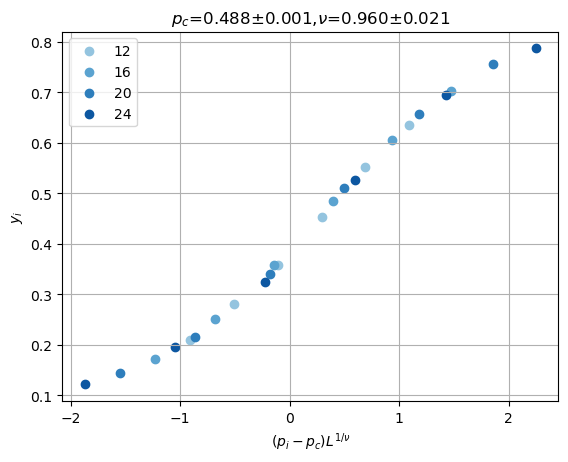

In [91]:
dc.plot_data_collapse()

In [92]:
dc_O_opt.add_optimal(dc)

## TMI

In [165]:
dc_opt=optimal_df(names=['Metrics', 'p_proj', 'p_ctrl','p_global'])

In [166]:
dc=DataCollapse(df=df_int,params={'Metrics':'TMI','p_proj':0,'p_global':0.},Lmin=12,Lmax=24,p_range=[0.10,.30],p_dim=3)
dc.datacollapse(nu=1.3,p_c=0.181,)

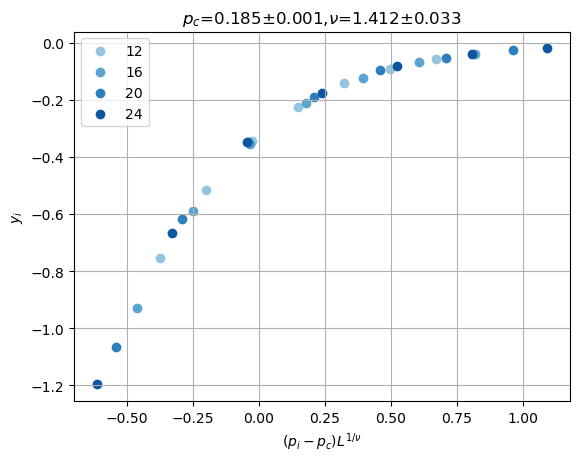

In [167]:
dc.plot_data_collapse()

In [168]:
dc_opt.add_optimal(dc)

In [169]:
dc=DataCollapse(df=df_int,params={'Metrics':'TMI','p_proj':0,'p_global':0.05},Lmin=16,Lmax=24,p_range=[0.14,.34],p_dim=3)
dc.datacollapse(nu=1.3,p_c=0.241,)
# [0.21,.39]

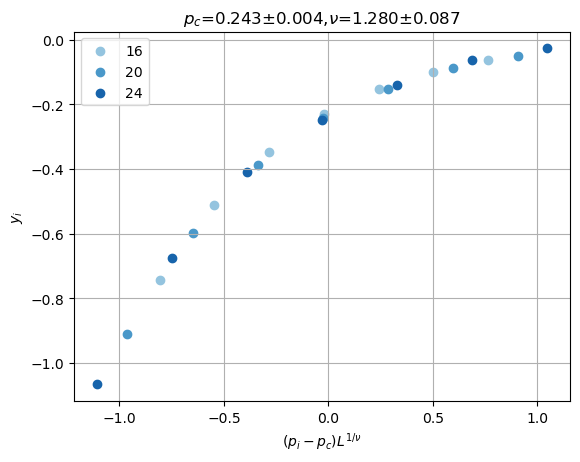

In [170]:
dc.plot_data_collapse()

In [171]:
dc_opt.add_optimal(dc)

In [172]:
dc=DataCollapse(df=df_int,params={'Metrics':'TMI','p_proj':0,'p_global':0.1},Lmin=12,Lmax=24,p_range=[0.20,.40],p_dim=3)
dc.datacollapse(nu=1.4,p_c=0.301,)

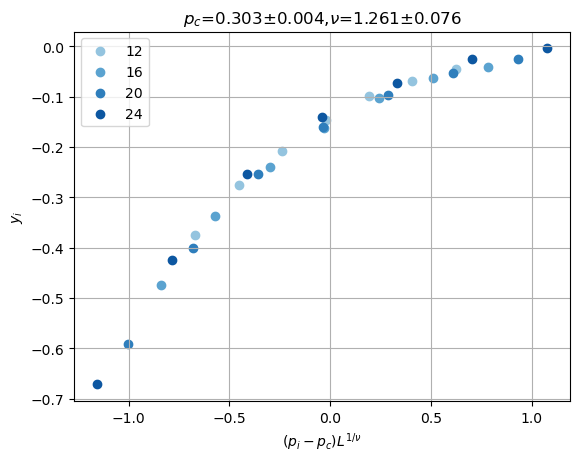

In [173]:
dc.plot_data_collapse()

In [174]:
dc_opt.add_optimal(dc)

In [175]:
dc=DataCollapse(df=df_int,params={'Metrics':'TMI','p_proj':0,'p_global':0.15},Lmin=12,Lmax=24,p_range=[0.22,.42],p_dim=3)
dc.datacollapse(nu=1.3,p_c=0.321,)

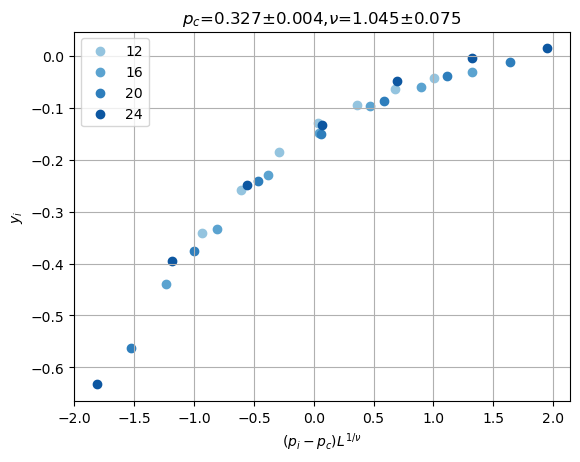

In [176]:
dc.plot_data_collapse()

In [177]:
dc_opt.add_optimal(dc)

In [178]:
dc=DataCollapse(df=df_int,params={'Metrics':'TMI','p_proj':0,'p_global':0.2},Lmin=12,Lmax=24,p_range=[0.24,.44],p_dim=3)
dc.datacollapse(nu=1.0,p_c=0.341,)

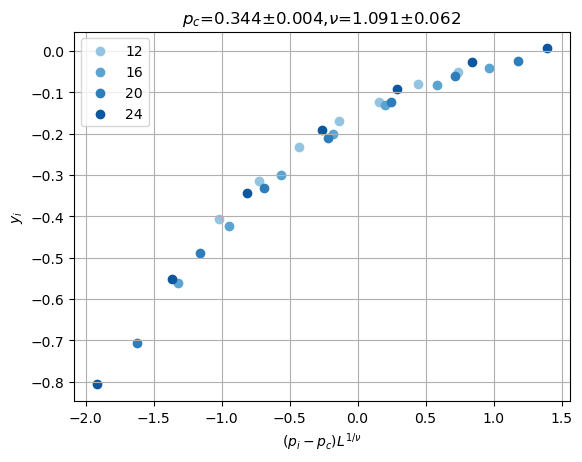

In [179]:
dc.plot_data_collapse()

In [180]:
dc_opt.add_optimal(dc)

In [181]:
dc=DataCollapse(df=df_int,params={'Metrics':'TMI','p_proj':0,'p_global':0.25},Lmin=12,Lmax=24,p_range=[0.26,.46],p_dim=3)
dc.datacollapse(nu=1.,p_c=0.359,)

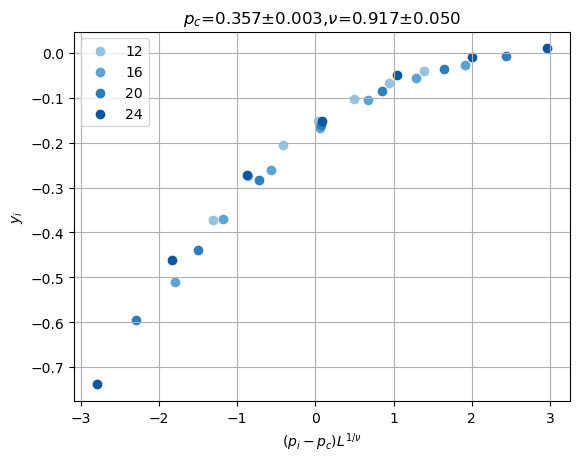

In [182]:
dc.plot_data_collapse()

In [183]:
dc_opt.add_optimal(dc)

In [184]:
dc=DataCollapse(df=df_int,params={'Metrics':'TMI','p_proj':0,'p_global':0.3},Lmin=12,Lmax=24,p_range=[0.3,.5],p_dim=3)
dc.datacollapse(nu=1.,p_c=0.4,)

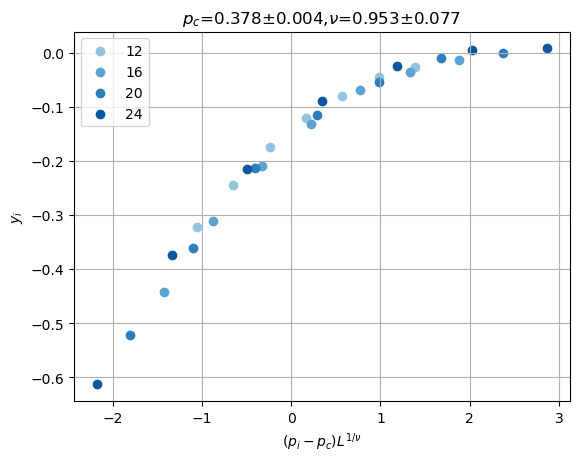

In [185]:
dc.plot_data_collapse()

In [186]:
dc_opt.add_optimal(dc)

In [187]:
dc=DataCollapse(df=df_int,params={'Metrics':'TMI','p_proj':0,'p_global':0.35},Lmin=12,Lmax=24,p_range=[0.30,.50],p_dim=3)
dc.datacollapse(nu=1.,p_c=0.4,)

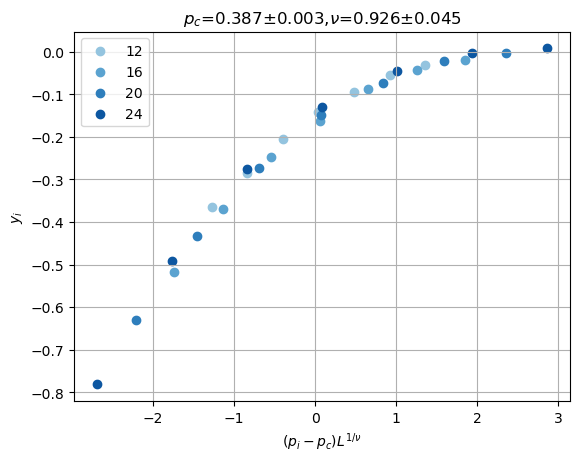

In [188]:
dc.plot_data_collapse()

In [189]:
dc_opt.add_optimal(dc)

In [190]:
dc=DataCollapse(df=df_int,params={'Metrics':'TMI','p_proj':0,'p_global':0.4},Lmin=12,Lmax=24,p_range=[0.32,.52],p_dim=3)
dc.datacollapse(nu=1.,p_c=0.421,)

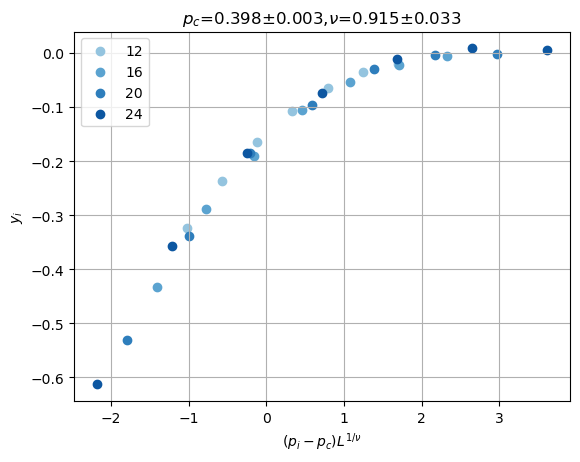

In [191]:
dc.plot_data_collapse()

In [192]:
dc_opt.add_optimal(dc)

In [193]:
dc=DataCollapse(df=df_int,params={'Metrics':'TMI','p_proj':0,'p_global':0.45},Lmin=12,Lmax=24,p_range=[0.33,.53],p_dim=3)
dc.datacollapse(nu=1.,p_c=0.431,)

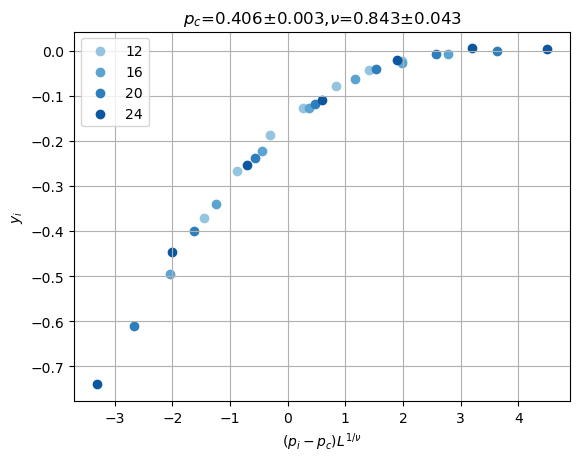

In [194]:
dc.plot_data_collapse()

In [195]:
dc_opt.add_optimal(dc)

In [196]:
dc=DataCollapse(df=df_int,params={'Metrics':'TMI','p_proj':0,'p_global':0.5},Lmin=12,Lmax=24,p_range=[0.33,.48],p_dim=3)
dc.datacollapse(nu=1.,p_c=0.431,)

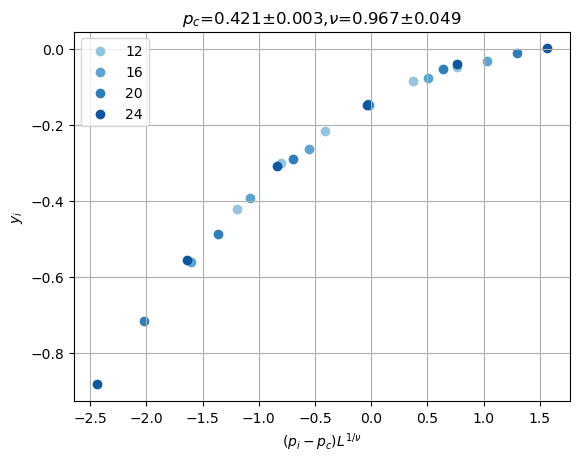

In [197]:
dc.plot_data_collapse()

In [198]:
dc_opt.add_optimal(dc)

In [199]:
dc=DataCollapse(df=df_int,params={'Metrics':'TMI','p_proj':0,'p_global':0.55},Lmin=12,Lmax=24,p_range=[0.32,.48],p_dim=3)
dc.datacollapse(nu=1.,p_c=0.421,)

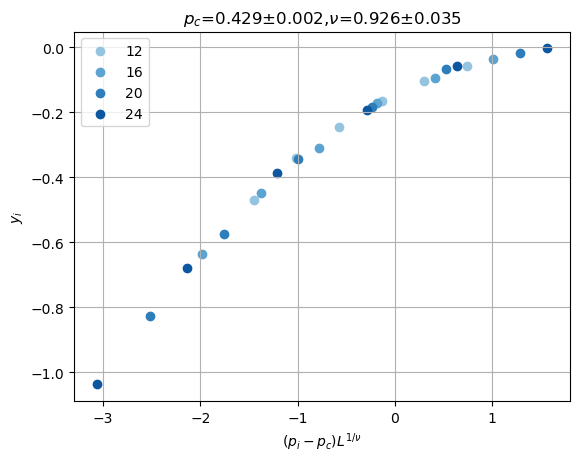

In [200]:
dc.plot_data_collapse()

In [201]:
dc_opt.add_optimal(dc)

In [202]:
dc=DataCollapse(df=df_int,params={'Metrics':'TMI','p_proj':0,'p_global':0.6},Lmin=12,Lmax=24,p_range=[0.33,.48],p_dim=3)
dc.datacollapse(nu=1.,p_c=0.431,)

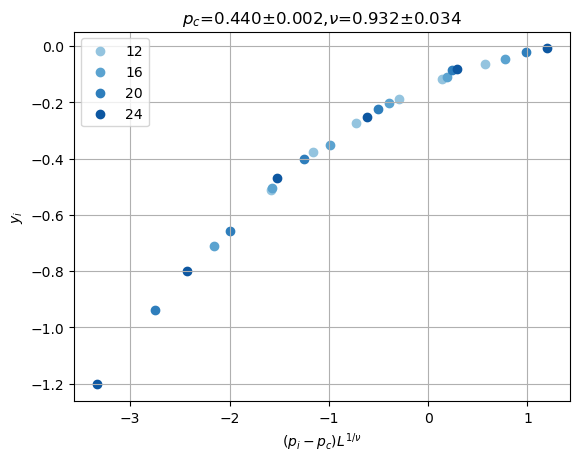

In [203]:
dc.plot_data_collapse()

In [204]:
dc_opt.add_optimal(dc)

In [205]:
dc=DataCollapse(df=df_int,params={'Metrics':'TMI','p_proj':0,'p_global':0.65},Lmin=12,Lmax=24,p_range=[0.34,.48],p_dim=3)
dc.datacollapse(nu=1.,p_c=0.441,)

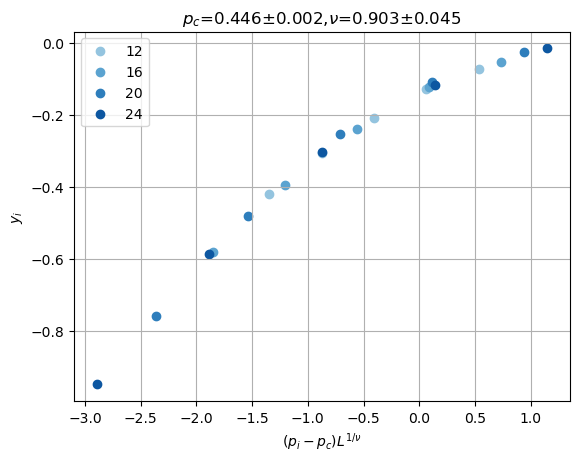

In [206]:
dc.plot_data_collapse()

In [207]:
dc_opt.add_optimal(dc)

In [208]:
dc=DataCollapse(df=df_int,params={'Metrics':'TMI','p_proj':0,'p_global':0.7},Lmin=12,Lmax=24,p_range=[0.35,.50],p_dim=3)
dc.datacollapse(nu=1.,p_c=0.451,)

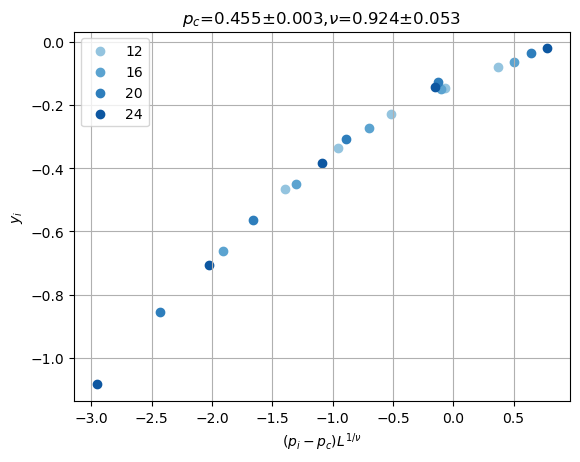

In [209]:
dc.plot_data_collapse()

In [210]:
dc_opt.add_optimal(dc)

In [211]:
dc=DataCollapse(df=df_int,params={'Metrics':'TMI','p_proj':0,'p_global':0.75},Lmin=12,Lmax=24,p_range=[0.35,.5],p_dim=3)
dc.datacollapse(nu=1.,p_c=0.451,)

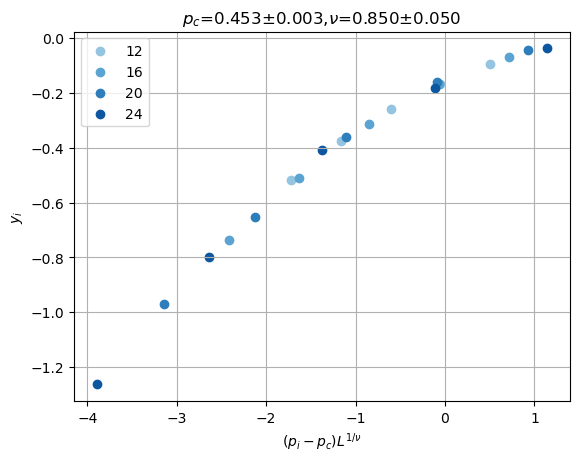

In [212]:
dc.plot_data_collapse()

In [213]:
dc_opt.add_optimal(dc)

In [214]:
dc=DataCollapse(df=df_int,params={'Metrics':'TMI','p_proj':0,'p_global':0.8},Lmin=12,Lmax=24,p_range=[0.39,.5],p_dim=3)
dc.datacollapse(nu=1.,p_c=0.459,)

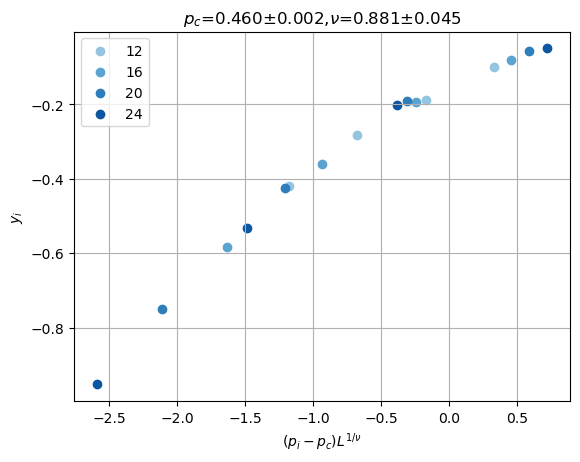

In [215]:
dc.plot_data_collapse()

In [216]:
dc_opt.add_optimal(dc)

In [217]:
dc=DataCollapse(df=df_int,params={'Metrics':'TMI','p_proj':0,'p_global':0.85},Lmin=12,Lmax=24,p_range=[0.39,.48],p_dim=3)
dc.datacollapse(nu=1.,p_c=0.461,)

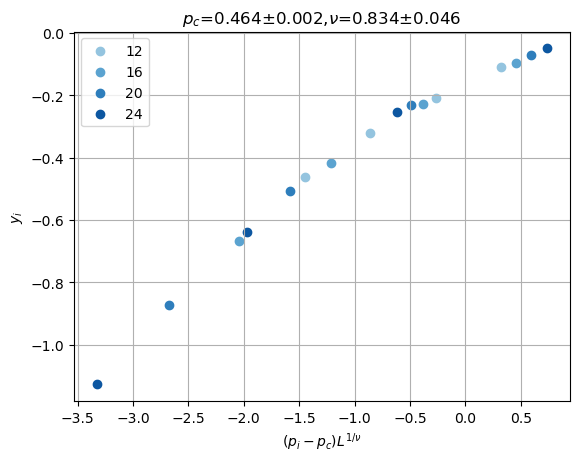

In [218]:
dc.plot_data_collapse()

In [219]:
dc_opt.add_optimal(dc)

In [220]:
dc=DataCollapse(df=df_int,params={'Metrics':'TMI','p_proj':0,'p_global':0.9},Lmin=12,Lmax=24,p_range=[0.37,.57],p_dim=3)
dc.datacollapse(nu=1.,p_c=0.471,)

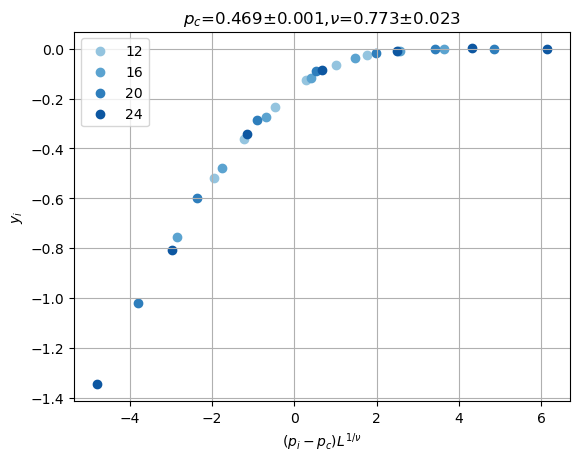

In [221]:
dc.plot_data_collapse()

In [222]:
dc_opt.add_optimal(dc)

In [223]:
dc=DataCollapse(df=df_int,params={'Metrics':'TMI','p_proj':0,'p_global':0.95},Lmin=12,Lmax=24,p_range=[0.37,.57],p_dim=3)
dc.datacollapse(nu=1.,p_c=0.471,)

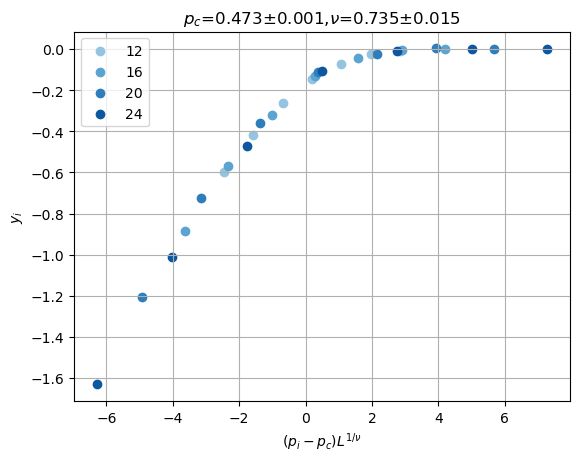

In [224]:
dc.plot_data_collapse()

In [225]:
dc_opt.add_optimal(dc)

In [226]:
dc=DataCollapse(df=df_int,params={'Metrics':'TMI','p_proj':0,'p_global':1},Lmin=12,Lmax=24,p_range=[0.37,.51],p_dim=3)
dc.datacollapse(nu=1.,p_c=0.471,)

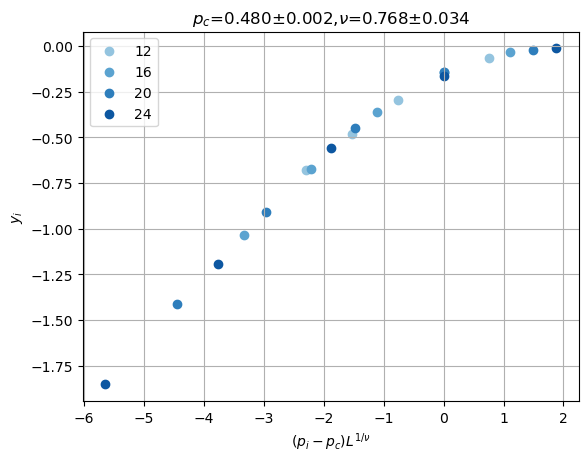

In [227]:
dc.plot_data_collapse()

In [228]:
dc=DataCollapse(df=df_int,params={'Metrics':'TMI','p_proj':0,'p_global':1},Lmin=12,Lmax=24,p_range=[0.41,.53],p_dim=3)
dc.datacollapse(nu=1.,p_c=0.501,)

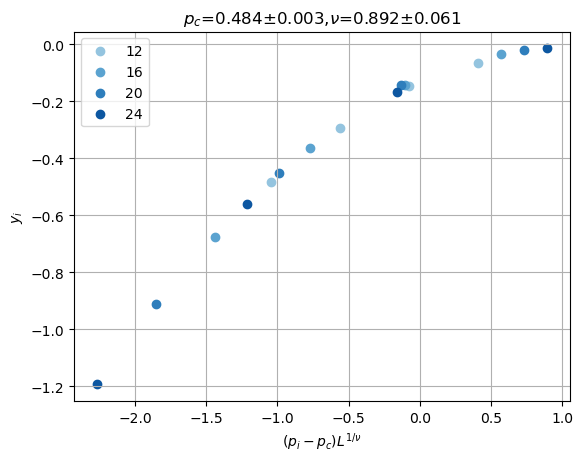

In [229]:
dc.plot_data_collapse()

In [230]:
dc_opt.add_optimal(dc)

In [231]:
dc_opt.opt_df

p_c  p_c_error        nu  nu_error     y  \
Metrics p_proj p_ctrl p_global                                                  
TMI     0      NaN    0.00      0.184781   0.001334  1.412296  0.033430  None   
                      0.05      0.242545   0.004251  1.279535  0.087197  None   
                      0.10      0.303291   0.003750  1.261438  0.075876  None   
                      0.15      0.326719   0.003646  1.044935  0.074914  None   
                      0.20      0.344219   0.003539  1.090661  0.062311  None   
                      0.25      0.357327   0.002733  0.916830  0.050394  None   
                      0.30      0.377683   0.004241  0.953259  0.076554  None   
                      0.35      0.387254   0.002514  0.926266  0.045029  None   
                      0.40      0.397757   0.002892  0.914873  0.032893  None   
                      0.45      0.406265   0.002585  0.842744  0.043372  None   
                      0.50      0.421361   0.002759  0.967219  0.049062  None   
                      0.55      0.429243   0.002225  0.926203  0.035369  None   
                      0.60      0.440290   0.002240  0.931885  0.033825  None   
                      0.65      0.445887   0.002440  0.903353  0.045168  None   
                      0.70      0.454928   0.003124  0.924099  0.052857  None   
                      0.75      0.452733   0.003263  0.850083  0.049851  None   
                      0.80      0.460417   0.002179  0.881415  0.045113  None   
                      0.85      0.463632   0.002314  0.833889  0.045548  None   
                      0.90      0.468903   0.001389  0.773424  0.023322  None   
                      0.95      0.473454   0.000964  0.735151  0.014970  None   
                      1.00      0.484498   0.002896  0.892426  0.060682  None   

                               y_error  
Metrics p_proj p_ctrl p_global          
TMI     0      NaN    0.00        None  
                      0.05        None  
                      0.10        None  
                      0.15        None  
                      0.20        None  
                      0.25        None  
                      0.30        None  
                      0.35        None  
                      0.40        None  
                      0.45        None  
                      0.50        None  
                      0.55        None  
                      0.60        None  
                      0.65        None  
                      0.70        None  
                      0.75        None  
                      0.80        None  
                      0.85        None  
                      0.90        None  
                      0.95        None  
                      1.00        None

In [243]:
with open('datacollapse_interpolate.pickle','wb') as f:
    pickle.dump([dc_O_opt.opt_df,dc_opt.opt_df],f)

In [233]:
dc_opt.opt_df

p_c  p_c_error        nu  nu_error     y  \
Metrics p_proj p_ctrl p_global                                                  
TMI     0      NaN    0.00      0.184781   0.001334  1.412296  0.033430  None   
                      0.05      0.242545   0.004251  1.279535  0.087197  None   
                      0.10      0.303291   0.003750  1.261438  0.075876  None   
                      0.15      0.326719   0.003646  1.044935  0.074914  None   
                      0.20      0.344219   0.003539  1.090661  0.062311  None   
                      0.25      0.357327   0.002733  0.916830  0.050394  None   
                      0.30      0.377683   0.004241  0.953259  0.076554  None   
                      0.35      0.387254   0.002514  0.926266  0.045029  None   
                      0.40      0.397757   0.002892  0.914873  0.032893  None   
                      0.45      0.406265   0.002585  0.842744  0.043372  None   
                      0.50      0.421361   0.002759  0.967219  0.049062  None   
                      0.55      0.429243   0.002225  0.926203  0.035369  None   
                      0.60      0.440290   0.002240  0.931885  0.033825  None   
                      0.65      0.445887   0.002440  0.903353  0.045168  None   
                      0.70      0.454928   0.003124  0.924099  0.052857  None   
                      0.75      0.452733   0.003263  0.850083  0.049851  None   
                      0.80      0.460417   0.002179  0.881415  0.045113  None   
                      0.85      0.463632   0.002314  0.833889  0.045548  None   
                      0.90      0.468903   0.001389  0.773424  0.023322  None   
                      0.95      0.473454   0.000964  0.735151  0.014970  None   
                      1.00      0.484498   0.002896  0.892426  0.060682  None   

                               y_error  
Metrics p_proj p_ctrl p_global          
TMI     0      NaN    0.00        None  
                      0.05        None  
                      0.10        None  
                      0.15        None  
                      0.20        None  
                      0.25        None  
                      0.30        None  
                      0.35        None  
                      0.40        None  
                      0.45        None  
                      0.50        None  
                      0.55        None  
                      0.60        None  
                      0.65        None  
                      0.70        None  
                      0.75        None  
                      0.80        None  
                      0.85        None  
                      0.90        None  
                      0.95        None  
                      1.00        None

In [234]:
dc_opt.opt_df

p_c  p_c_error        nu  nu_error     y  \
Metrics p_proj p_ctrl p_global                                                  
TMI     0      NaN    0.00      0.184781   0.001334  1.412296  0.033430  None   
                      0.05      0.242545   0.004251  1.279535  0.087197  None   
                      0.10      0.303291   0.003750  1.261438  0.075876  None   
                      0.15      0.326719   0.003646  1.044935  0.074914  None   
                      0.20      0.344219   0.003539  1.090661  0.062311  None   
                      0.25      0.357327   0.002733  0.916830  0.050394  None   
                      0.30      0.377683   0.004241  0.953259  0.076554  None   
                      0.35      0.387254   0.002514  0.926266  0.045029  None   
                      0.40      0.397757   0.002892  0.914873  0.032893  None   
                      0.45      0.406265   0.002585  0.842744  0.043372  None   
                      0.50      0.421361   0.002759  0.967219  0.049062  None   
                      0.55      0.429243   0.002225  0.926203  0.035369  None   
                      0.60      0.440290   0.002240  0.931885  0.033825  None   
                      0.65      0.445887   0.002440  0.903353  0.045168  None   
                      0.70      0.454928   0.003124  0.924099  0.052857  None   
                      0.75      0.452733   0.003263  0.850083  0.049851  None   
                      0.80      0.460417   0.002179  0.881415  0.045113  None   
                      0.85      0.463632   0.002314  0.833889  0.045548  None   
                      0.90      0.468903   0.001389  0.773424  0.023322  None   
                      0.95      0.473454   0.000964  0.735151  0.014970  None   
                      1.00      0.484498   0.002896  0.892426  0.060682  None   

                               y_error  
Metrics p_proj p_ctrl p_global          
TMI     0      NaN    0.00        None  
                      0.05        None  
                      0.10        None  
                      0.15        None  
                      0.20        None  
                      0.25        None  
                      0.30        None  
                      0.35        None  
                      0.40        None  
                      0.45        None  
                      0.50        None  
                      0.55        None  
                      0.60        None  
                      0.65        None  
                      0.70        None  
                      0.75        None  
                      0.80        None  
                      0.85        None  
                      0.90        None  
                      0.95        None  
                      1.00        None

In [235]:
--

SyntaxError: invalid syntax (3659366440.py, line 1)

# Phase diagram

In [236]:
dc_opt.opt_df.index.get_level_values('p_global')

Float64Index([ 0.0, 0.05,  0.1, 0.15,  0.2, 0.25,  0.3, 0.35,  0.4, 0.45,  0.5,
              0.55,  0.6, 0.65,  0.7, 0.75,  0.8, 0.85,  0.9, 0.95,  1.0],
             dtype='float64', name='p_global')

In [237]:
dc_opt.opt_df['p_c'].values

array([0.18478105, 0.24254533, 0.30329077, 0.32671856, 0.34421897,
       0.35732745, 0.37768326, 0.38725373, 0.39775693, 0.40626542,
       0.42136149, 0.42924293, 0.44028996, 0.44588733, 0.45492788,
       0.45273325, 0.46041715, 0.4636318 , 0.46890339, 0.47345408,
       0.48449797])

In [238]:
import matplotlib.pyplot as plt

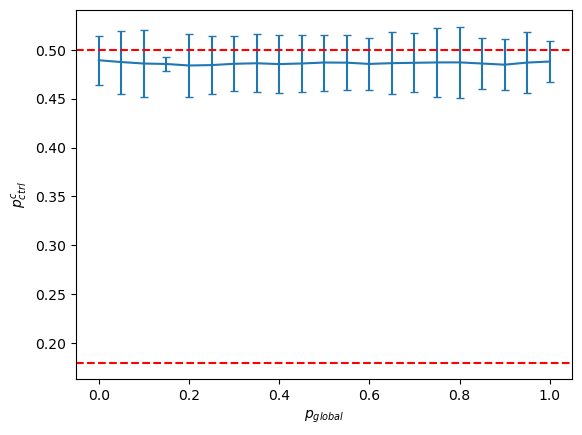

In [239]:
fig,ax=plt.subplots()

ax.errorbar(dc_O_opt.opt_df.index.get_level_values('p_global'),dc_O_opt.opt_df['p_c'].values,yerr=dc_O_opt.opt_df['nu_error'].values,capsize=3)

ax.set_ylabel(r'$p_{ctrl}^c$')
ax.set_xlabel(r'$p_{global}$')
ax.axhline(y=0.18,ls='dashed',color='r')
ax.axhline(y=0.5,ls='dashed',color='r')

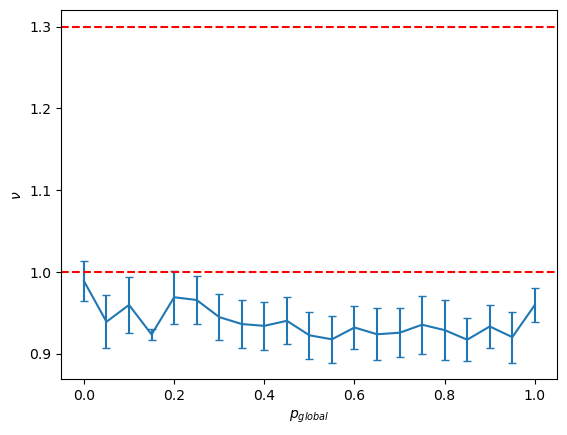

In [240]:
fig,ax=plt.subplots()
ax.errorbar(dc_O_opt.opt_df.index.get_level_values('p_global'),dc_O_opt.opt_df['nu'].values,yerr=dc_O_opt.opt_df['nu_error'].values,capsize=3)
ax.set_ylabel(r'$\nu$')
ax.set_xlabel(r'$p_{global}$')
ax.axhline(y=1.3,ls='dashed',color='r')
ax.axhline(y=1,ls='dashed',color='r')

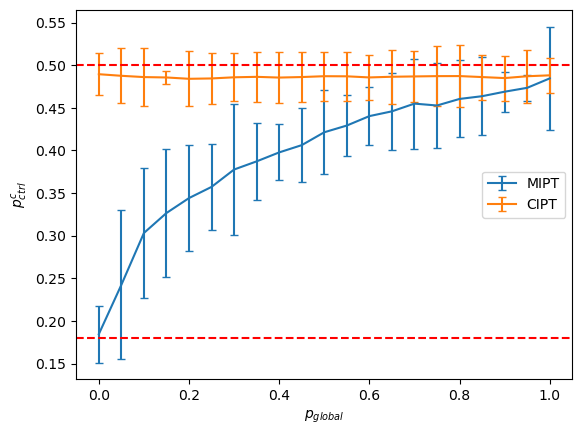

In [241]:
fig,ax=plt.subplots()

ax.errorbar(dc_opt.opt_df.index.get_level_values('p_global'),dc_opt.opt_df['p_c'].values,yerr=dc_opt.opt_df['nu_error'].values,capsize=3,label='MIPT')
ax.errorbar(dc_O_opt.opt_df.index.get_level_values('p_global'),dc_O_opt.opt_df['p_c'].values,yerr=dc_O_opt.opt_df['nu_error'].values,capsize=3,label='CIPT')

ax.set_ylabel(r'$p_{ctrl}^c$')
ax.set_xlabel(r'$p_{global}$')
ax.axhline(y=0.18,ls='dashed',color='r')
ax.axhline(y=0.5,ls='dashed',color='r')
ax.legend()

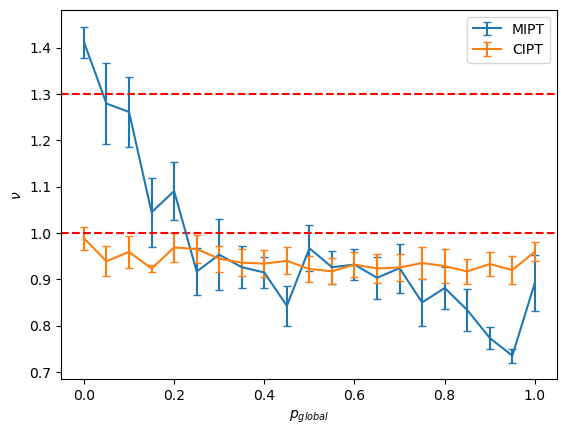

In [242]:
fig,ax=plt.subplots()
ax.errorbar(dc_opt.opt_df.index.get_level_values('p_global'),dc_opt.opt_df['nu'].values,yerr=dc_opt.opt_df['nu_error'].values,capsize=3,label='MIPT')
ax.errorbar(dc_O_opt.opt_df.index.get_level_values('p_global'),dc_O_opt.opt_df['nu'].values,yerr=dc_O_opt.opt_df['nu_error'].values,capsize=3,label='CIPT')

ax.set_ylabel(r'$\nu$')
ax.set_xlabel(r'$p_{global}$')
ax.axhline(y=1.3,ls='dashed',color='r')
ax.axhline(y=1,ls='dashed',color='r')

# ax.set_xlim([0,0.7])
ax.legend()

In [ ]:
dc_TMI_opt.add_optimal(dc)

In [ ]:

dc=DataCollapse(df=df_1_3,params={'Metrics':'TMI','p_proj':0.06},Lmin=12,Lmax=24,p_range=[0.4,0.56],p_dim=2)
dc.datacollapse(nu=1.,p_c=0.501,)